# v2 - QML optimization + execution of circuit with best params

___________________
___________________
___________________

In [1]:
%load_ext autoreload
%autoreload 2

from troter_utils import *

### Quantum Devices


In [2]:
# load IBMQ Account data
provider = IBMQ.load_account()

# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim_no_noise = QasmSimulator()

____________

### First order, 4 steps, variable time

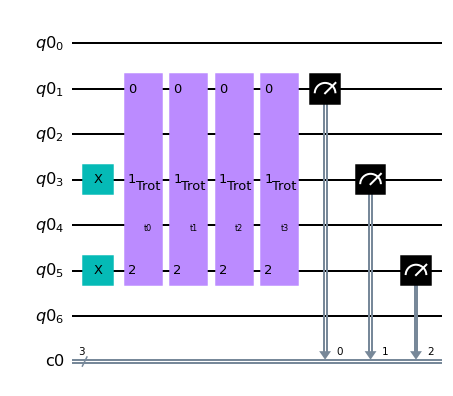

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.07778
Current parameters: [0.423 1.158 0.744 0.816] (sum to 3.14)

Iter 2 done!
Loss value: -0.32833
Current parameters: [5.598e-01 1.206e+00 1.110e-16 1.376e+00] (sum to 3.14)

Iter 3 done!
Loss value: -0.41654
Current parameters: [4.835e-01 1.287e+00 1.287e-13 1.371e+00] (sum to 3.14)

Iter 4 done!
Loss value: -0.74045
Current parameters: [0.    1.541 0.    1.601] (sum to 3.14)

Iter 5 done!
Loss value: -0.74051
Current parameters: [1.045e-13 1.546e+00 0.000e+00 1.596e+00] (sum to 3.14)

Iter 6 done!
Loss value: -0.74081
Current parameters: [0.000e+00 1.567e+00 8.702e-14 1.574e+00] (sum to 3.14)

Iter 7 done!
Loss value: -0.74082
Current parameters: [2.644e-14 1.572e+00 0.000e+00 1.570e+00] (sum to 3.14)

Iter 8 done!
Loss value: -0.74082
Current parameters: [0.000e+00 1.572e+00 1.533e-13 1.570e+00] (sum to 3.14)

Optimizat

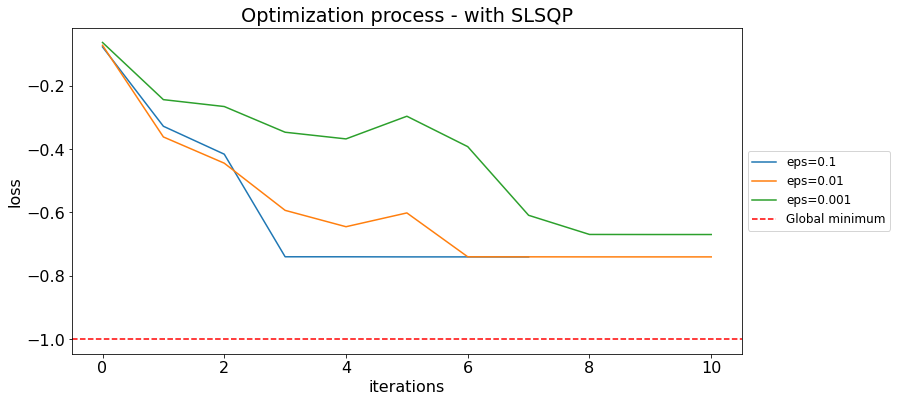


Optimization results:



optimizer    eps                                       final_params  \
0     slsqp  0.100  [2.641873366655152e-14, 1.5715812613537745, 1....   
1     slsqp  0.010  [1.262988508335826e-14, 1.5717230419996395, 1....   
2     slsqp  0.001  [0.0, 1.5717684348859602, 0.008563249638148559...   

   final_loss  
0    -0.74082  
1    -0.74082  
2    -0.67017

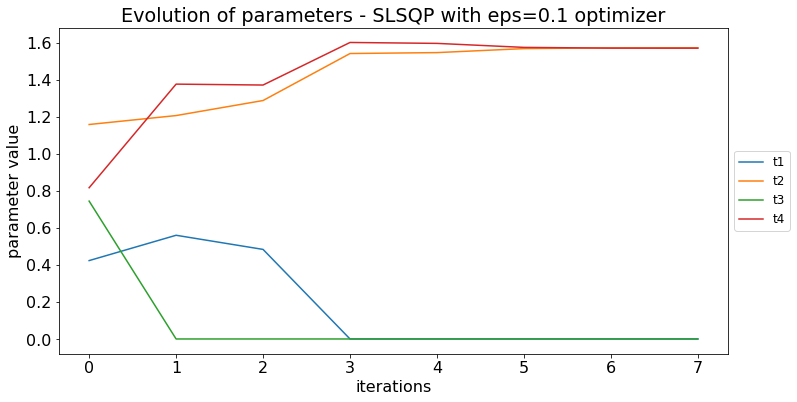

Best parameters (sum to 3.14):	[2.642e-14 1.572e+00 1.497e-16 1.570e+00]
Best parameters (sum to 1):	[8.409e-15 5.002e-01 4.766e-17 4.998e-01]


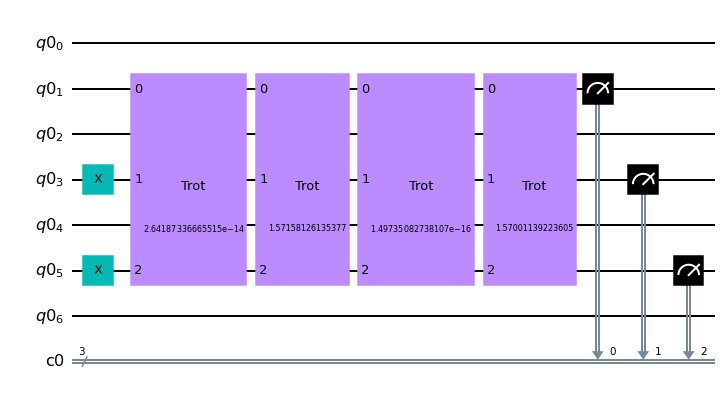

################################################################################
Single trotterization step:


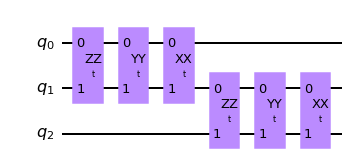

################################################################################

All steps + measurements of state tomography:


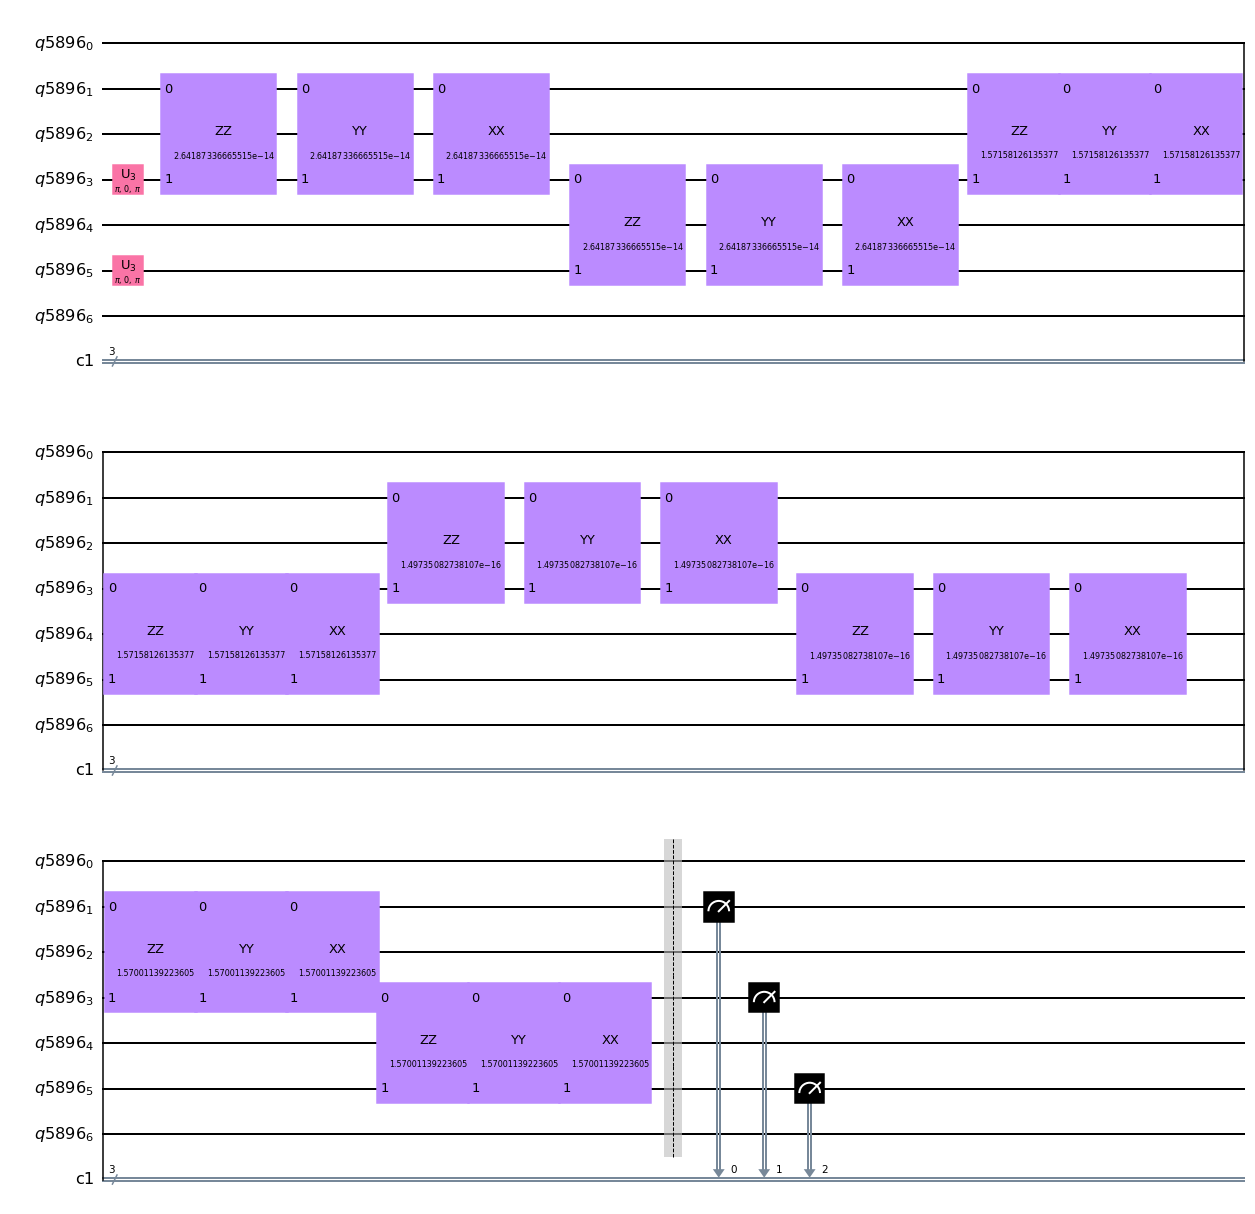

################################################################################

1/8 - Job ID 285ee6d2-364c-4a5d-991e-24915f56c20a
2/8 - Job ID 6f1a8606-5ce5-452a-845a-b75a0fb5311d
3/8 - Job ID 1aa83740-b71d-4b59-b254-f6ddea121bfc
4/8 - Job ID d305d066-622a-47fc-b165-30b1b9901562
5/8 - Job ID be8e68cb-813f-404a-82fb-27eb6ddc7fa4
6/8 - Job ID 89c683fe-07ae-4033-835f-f04e345b326a
7/8 - Job ID bad09af3-3af2-4a09-9eb5-cb3c5ef05add
8/8 - Job ID 4dfb9f85-aff4-44a7-bbd4-dee384a71f86

################################################################################

Final results - order: 1 - strotter steps: 4

State tomography fidelity = 0.7409 ± 0.0017

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:48



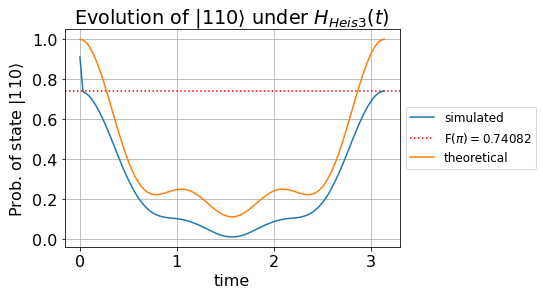

In [3]:
order, trotter_steps = 1, 4
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### First order, 5 steps, variable time

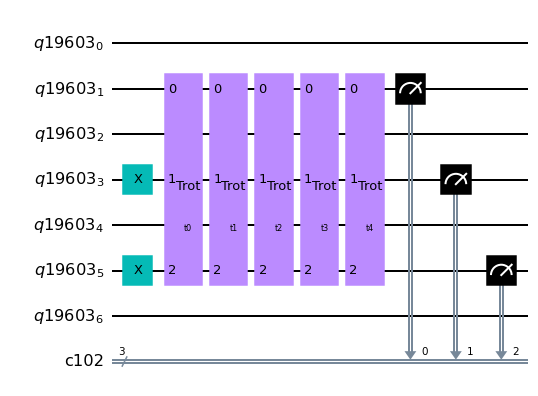

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.09291
Current parameters: [0.324 1.095 0.805 0.609 0.308] (sum to 3.14)

Iter 2 done!
Loss value: -0.02448
Current parameters: [0.    1.278 0.777 0.    1.087] (sum to 3.14)

Iter 3 done!
Loss value: -0.23256
Current parameters: [0.039 1.122 0.981 0.411 0.589] (sum to 3.14)

Iter 4 done!
Loss value: -0.3185
Current parameters: [1.457e-16 1.198e+00 1.147e+00 3.644e-01 4.325e-01] (sum to 3.14)

Iter 5 done!
Loss value: -0.47097
Current parameters: [8.586e-15 1.472e+00 1.271e+00 3.989e-01 1.799e-14] (sum to 3.14)

Iter 6 done!
Loss value: -0.55552
Current parameters: [0.    1.525 1.304 0.313 0.   ] (sum to 3.14)

Iter 7 done!
Loss value: -0.65637
Current parameters: [0.    1.613 1.411 0.117 0.   ] (sum to 3.14)

Iter 8 done!
Loss value: -0.66383
Current parameters: [0.    1.617 1.443 0.082 0.   ] (sum to 3.14)

Iter 9 done!
Loss 

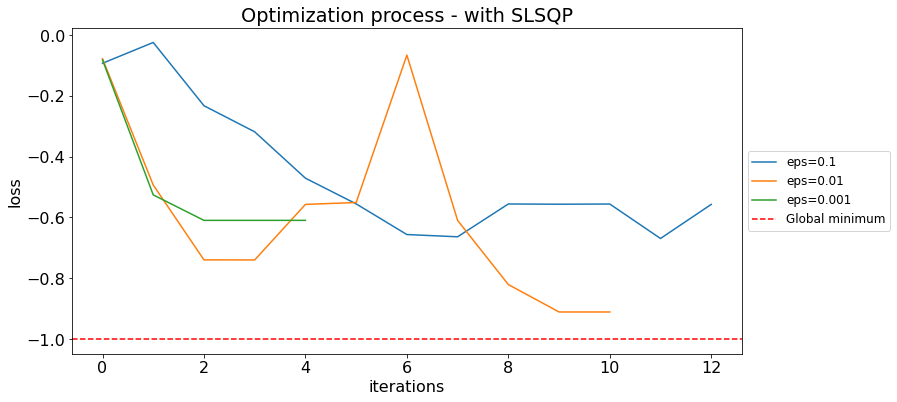


Optimization results:



optimizer    eps                                       final_params  \
1     slsqp  0.010  [1.2870252519347978e-13, 1.5656228314433266e-1...   
0     slsqp  0.100  [4.239040205093801e-17, 1.5870531902504663, 1....   
2     slsqp  0.001  [0.0, 1.503224968097038e-07, 1.583925812162879...   

   final_loss  
1    -0.91118  
0    -0.66940  
2    -0.60978

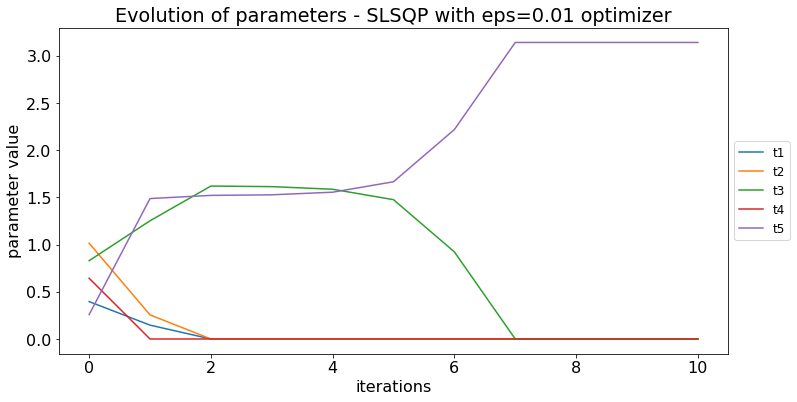

Best parameters (sum to 3.14):	[1.287e-13 1.566e-13 0.000e+00 1.441e-13 3.142e+00]
Best parameters (sum to 1):	[4.097e-14 4.984e-14 0.000e+00 4.588e-14 1.000e+00]


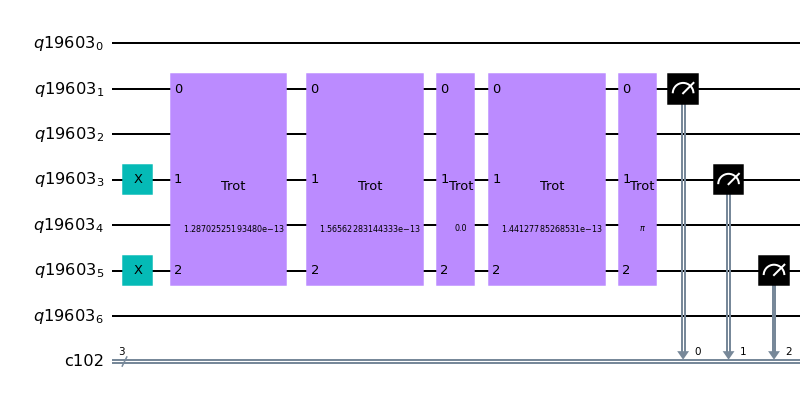

################################################################################
Single trotterization step:


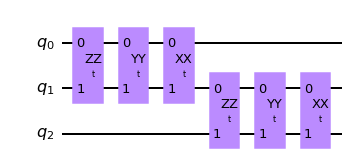

################################################################################

All steps + measurements of state tomography:


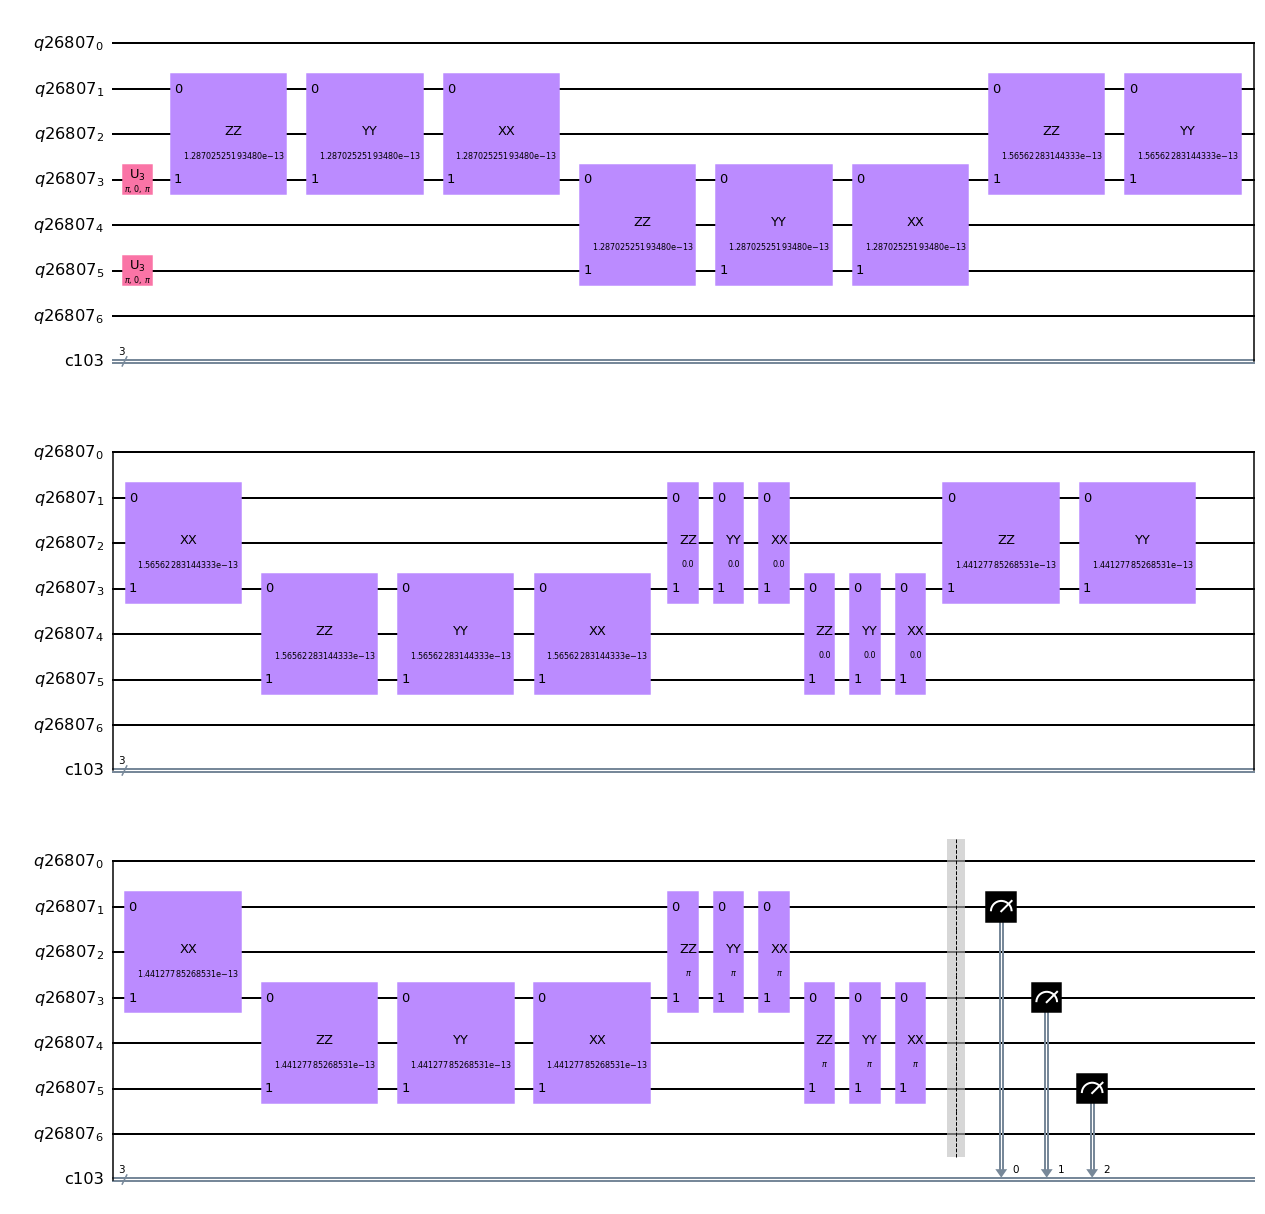

################################################################################

1/8 - Job ID 7681b027-6b29-4734-9699-b5de244e3151
2/8 - Job ID e37b9c8a-2406-4912-8d4b-6d39a169b2bb
3/8 - Job ID 5ee3097c-f1ca-4837-91a6-35e8be21a8fa
4/8 - Job ID cf176e56-1ea1-4d0c-a1bc-37def2f8291b
5/8 - Job ID 6e5607c4-4c33-4866-a27e-78f1e40a5dca
6/8 - Job ID 4f91ca5a-9bff-4008-aed4-9ebda23d0ff8
7/8 - Job ID 3fe3f403-6f4e-4b89-bee4-7ab9f7ac54fa
8/8 - Job ID 81f2a60d-f632-407b-ad14-adc8e71d9d8f

################################################################################

Final results - order: 1 - strotter steps: 5

State tomography fidelity = 0.9116 ± 0.0013

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:50



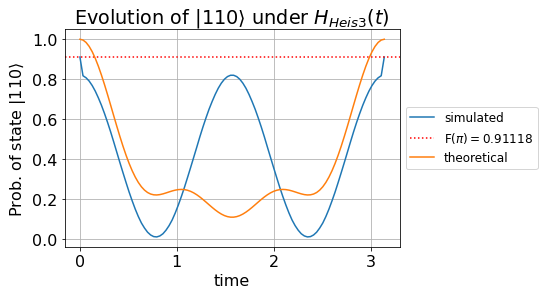

In [4]:
order, trotter_steps = 1, 5
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### First order, 6 steps, variable time

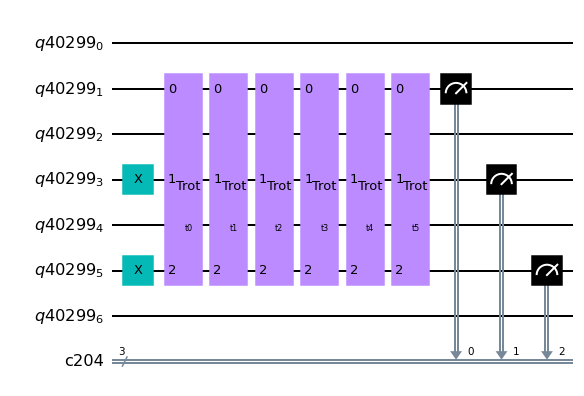

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.19907
Current parameters: [0.301 0.955 0.834 0.417 0.264 0.372] (sum to 3.14)

Iter 2 done!
Loss value: -0.15191
Current parameters: [0.    0.986 0.881 0.    0.333 0.942] (sum to 3.14)

Iter 3 done!
Loss value: -0.2264
Current parameters: [0.    1.077 0.8   0.29  0.304 0.671] (sum to 3.14)

Iter 4 done!
Loss value: -0.26915
Current parameters: [6.799e-17 1.125e+00 8.854e-01 3.041e-01 2.063e-01 6.209e-01] (sum to 3.14)

Iter 5 done!
Loss value: -0.59993
Current parameters: [2.946e-16 1.466e+00 1.544e+00 9.043e-02 1.665e-16 4.109e-02] (sum to 3.14)

Iter 6 done!
Loss value: -0.66854
Current parameters: [1.099e-15 1.514e+00 1.595e+00 3.288e-02 1.805e-16 3.469e-15] (sum to 3.14)

Iter 7 done!
Loss value: -0.66886
Current parameters: [0.    1.52  1.595 0.027 0.    0.   ] (sum to 3.14)

Iter 8 done!
Loss value: -0.74047
Current par

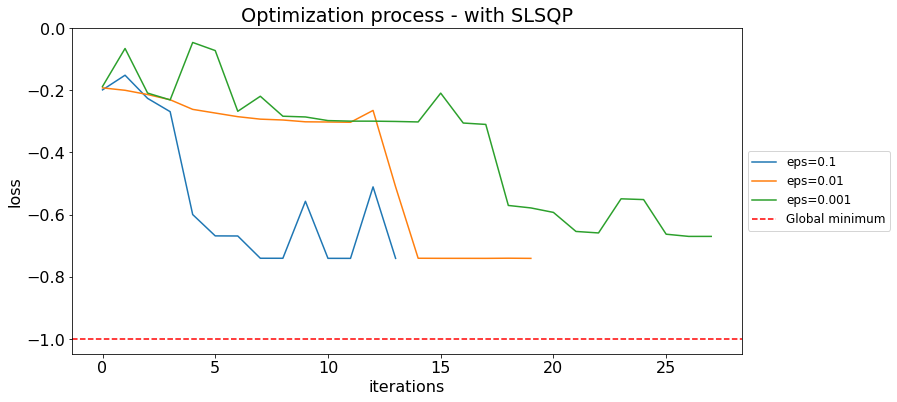


Optimization results:



optimizer    eps                                       final_params  \
0     slsqp  0.100  [0.0, 1.5719428198715149, 1.5696498338171612, ...   
1     slsqp  0.010  [4.401512177785942e-18, 1.2796007384274401e-18...   
2     slsqp  0.001  [0.0, 0.0, 1.8931783218793157e-11, 1.571124526...   

   final_loss  
0    -0.74082  
1    -0.74082  
2    -0.67019

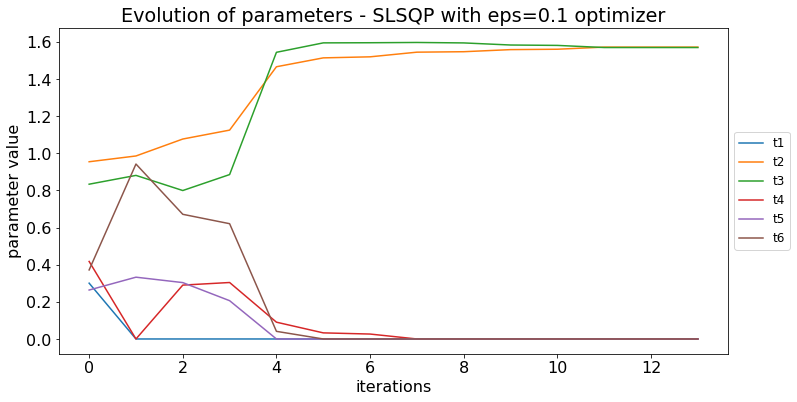

Best parameters (sum to 3.14):	[0.    1.572 1.57  0.    0.    0.   ]
Best parameters (sum to 1):	[0.  0.5 0.5 0.  0.  0. ]


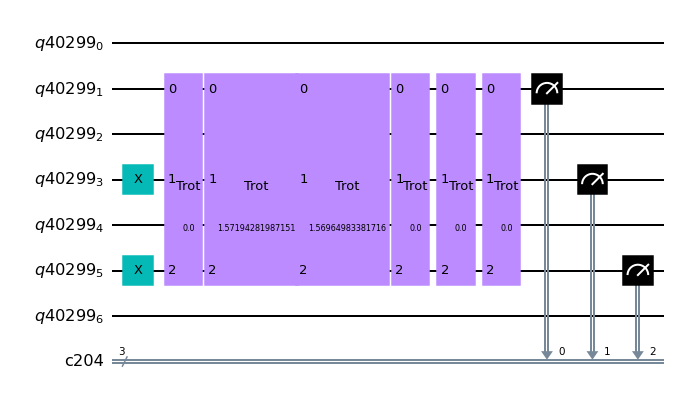

################################################################################
Single trotterization step:


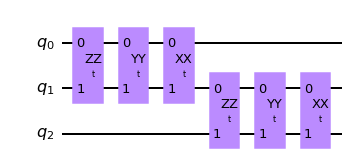

################################################################################

All steps + measurements of state tomography:


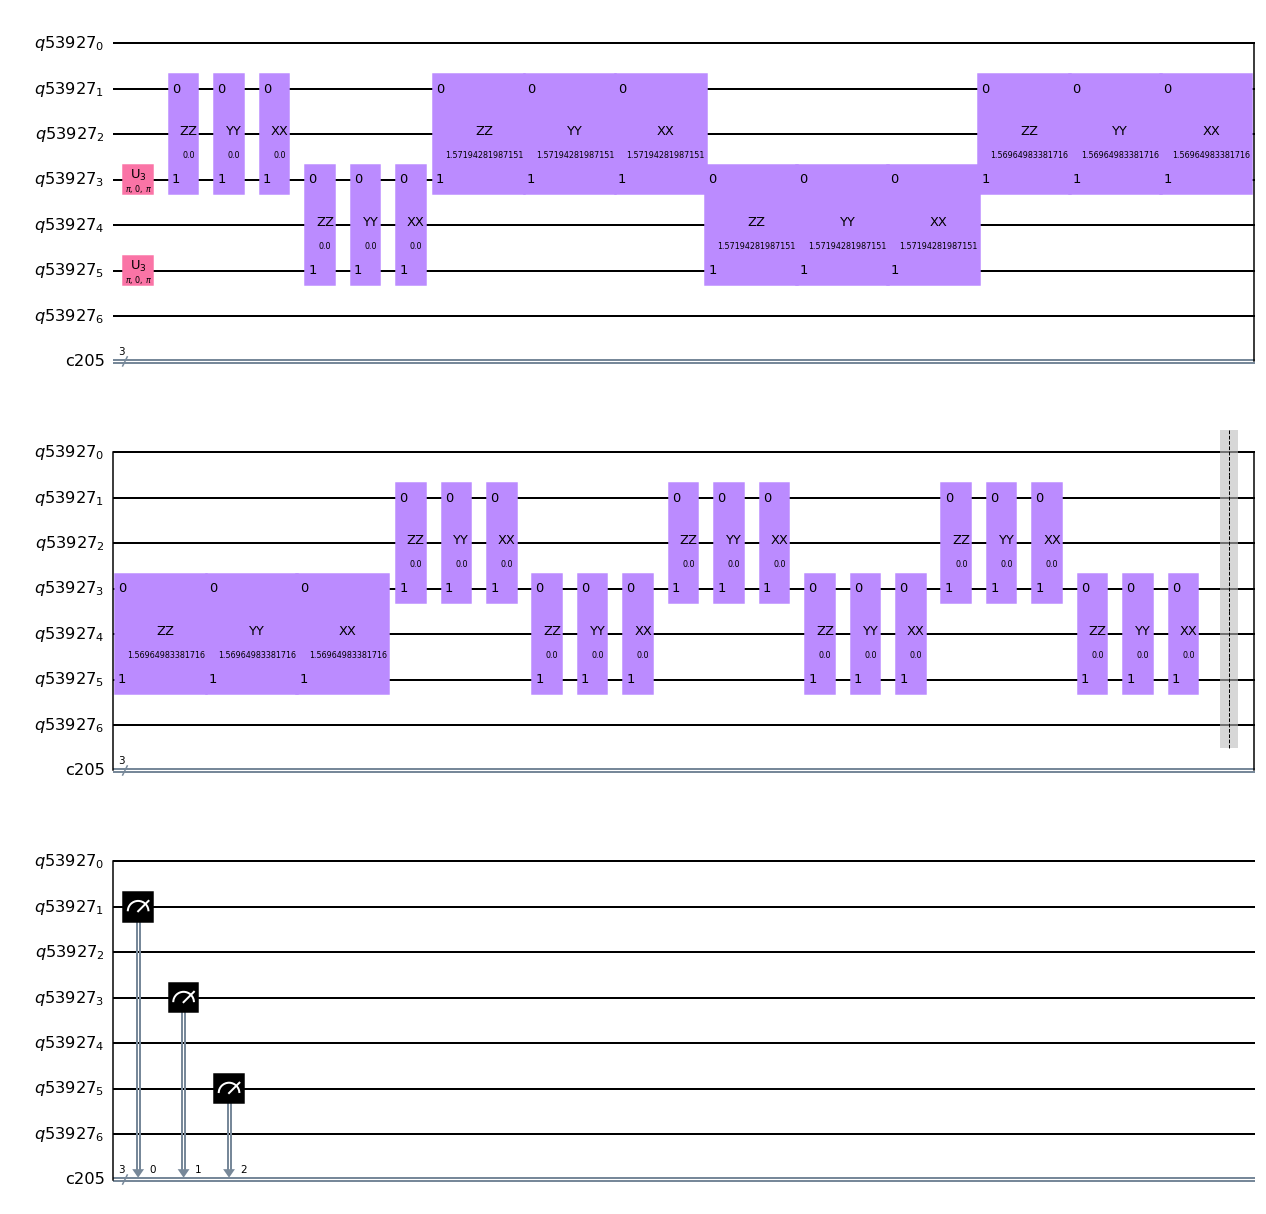

################################################################################

1/8 - Job ID 1ff748f7-d1bf-4193-b697-dd34dad495aa
2/8 - Job ID b1e51532-3fe6-4253-805e-12a96be49a1b
3/8 - Job ID 063e019d-a81b-449d-b136-29d18054533c
4/8 - Job ID 92c5b24a-a784-487b-8720-e138b55fcdae
5/8 - Job ID f52052ed-f1e0-454e-b73f-7c7c47a4603d
6/8 - Job ID 52b4127e-140e-4895-afb0-9906ec871951
7/8 - Job ID 94461db8-7c97-4e98-9b31-f6f2fac06be2
8/8 - Job ID a1be74ac-a51d-4898-a94c-03f2ce09556b

################################################################################

Final results - order: 1 - strotter steps: 6

State tomography fidelity = 0.7413 ± 0.0015

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:45



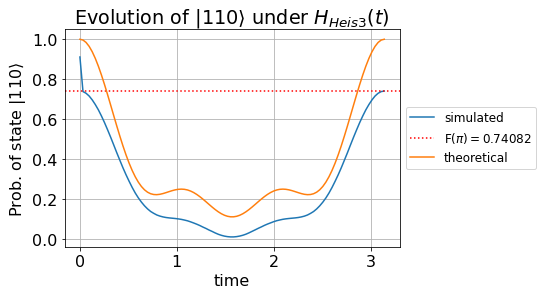

In [5]:
order, trotter_steps = 1, 6
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### First order, 7 steps, variable time

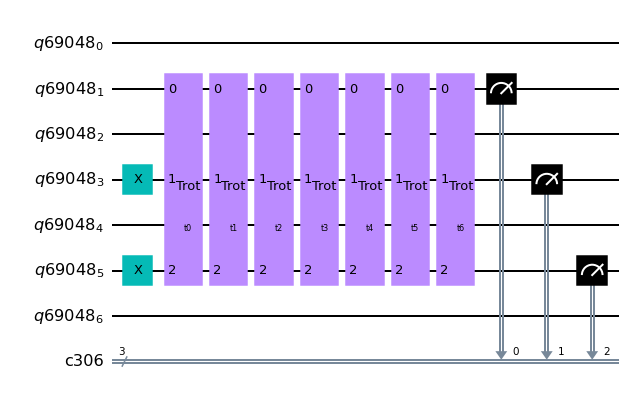

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.21079
Current parameters: [0.295 0.886 0.826 0.374 0.213 0.317 0.23 ] (sum to 3.14)

Iter 2 done!
Loss value: -0.15217
Current parameters: [0.24  0.831 0.877 0.    0.203 0.325 0.664] (sum to 3.14)

Iter 3 done!
Loss value: -0.20918
Current parameters: [0.102 0.962 0.756 0.129 0.252 0.238 0.703] (sum to 3.14)

Iter 4 done!
Loss value: -0.22389
Current parameters: [0.164 0.963 0.839 0.219 0.185 0.169 0.603] (sum to 3.14)

Iter 5 done!
Loss value: -0.2483
Current parameters: [0.113 1.083 0.865 0.261 0.16  0.113 0.546] (sum to 3.14)

Iter 6 done!
Loss value: -0.31578
Current parameters: [0.    1.321 0.994 0.294 0.063 0.    0.471] (sum to 3.14)

Iter 7 done!
Loss value: -0.35717
Current parameters: [2.276e-14 1.298e+00 1.115e+00 3.433e-01 1.292e-01 1.794e-14 2.563e-01] (sum to 3.14)

Iter 8 done!
Loss value: -0.39951
Current param

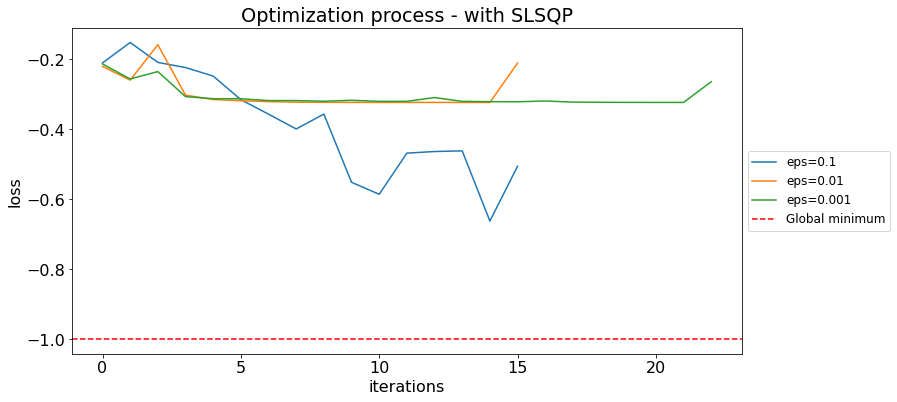


Optimization results:



optimizer    eps                                       final_params  \
0     slsqp  0.100  [3.0148338360471267e-15, 1.5503974651562225, 1...   
1     slsqp  0.010  [0.42716668098538224, 0.3605427017224611, 0.38...   
2     slsqp  0.001  [0.42623322682236053, 0.349345842248538, 0.372...   

   final_loss  
0    -0.66277  
1    -0.32376  
2    -0.32370

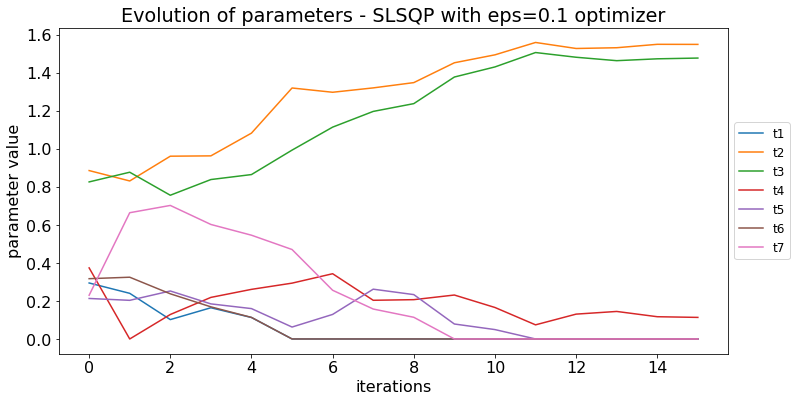

Best parameters (sum to 3.14):	[3.015e-15 1.550e+00 1.474e+00 1.171e-01 1.291e-13 3.011e-15 1.637e-14]
Best parameters (sum to 1):	[9.597e-16 4.935e-01 4.692e-01 3.727e-02 4.108e-14 9.584e-16 5.210e-15]


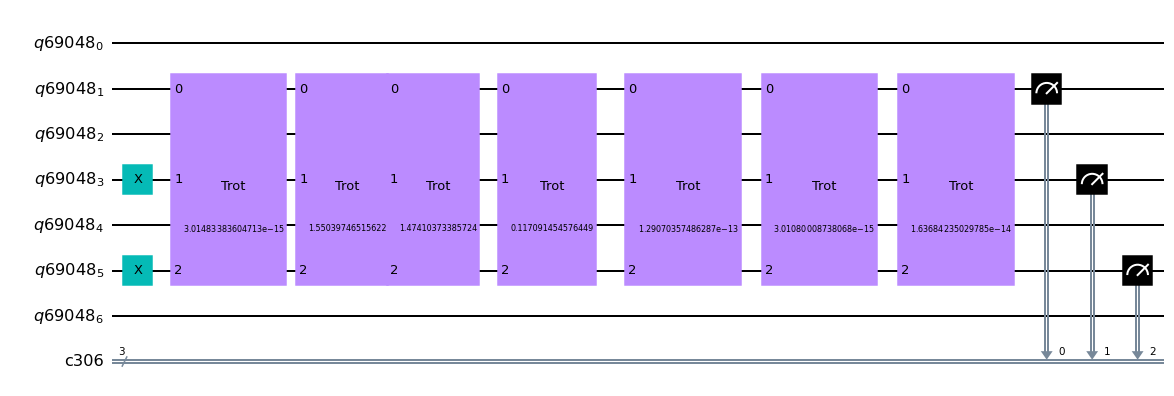

################################################################################
Single trotterization step:


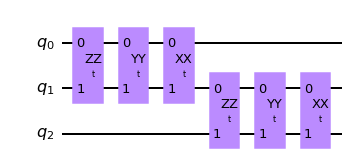

################################################################################

All steps + measurements of state tomography:


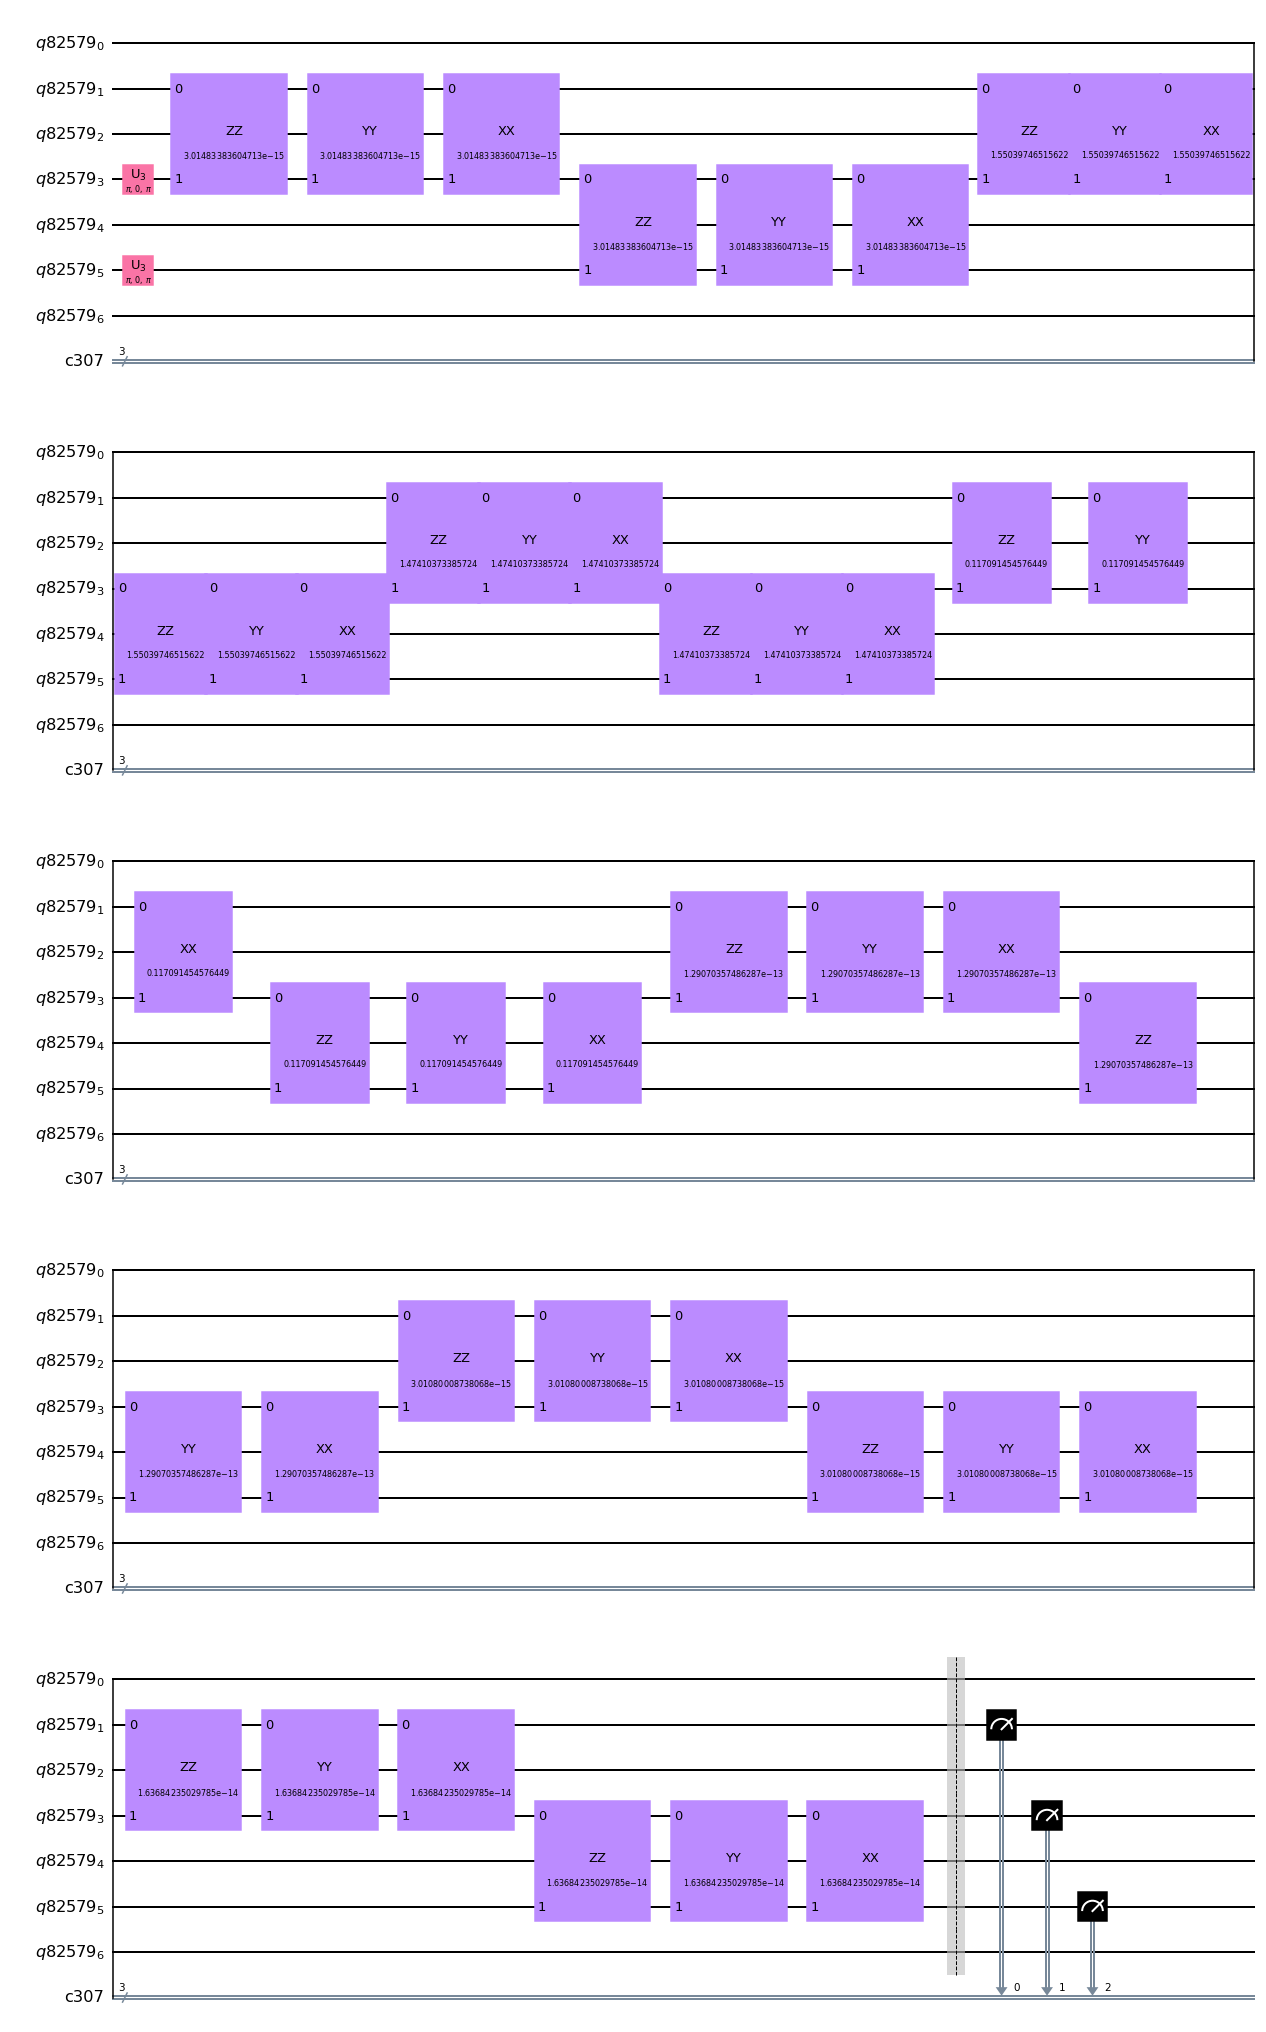

################################################################################

1/8 - Job ID a361bdca-8494-47af-a23f-c221582cb264
2/8 - Job ID 9c8e89dc-8ec7-4c1f-b15d-da470c957f06
3/8 - Job ID b7a1e543-9abb-42b6-8abb-2d40d45f2f27
4/8 - Job ID 2b1856d4-3cf1-414b-836b-ba811a7ccea8
5/8 - Job ID 76f38aa9-b2b1-4918-898e-1f474f429782
6/8 - Job ID 3f0f9f1f-4606-47fc-94cd-4a35bc55395d
7/8 - Job ID 7d2f499c-7340-433b-9e18-461bdbedfb51
8/8 - Job ID 84cd1d52-eae0-41dd-bca7-34308bc0f6ac

################################################################################

Final results - order: 1 - strotter steps: 7

State tomography fidelity = 0.6641 ± 0.0027

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:34



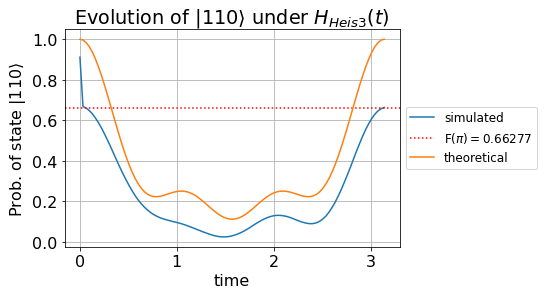

In [6]:
order, trotter_steps = 1, 7
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### First order, 8 steps, variable time

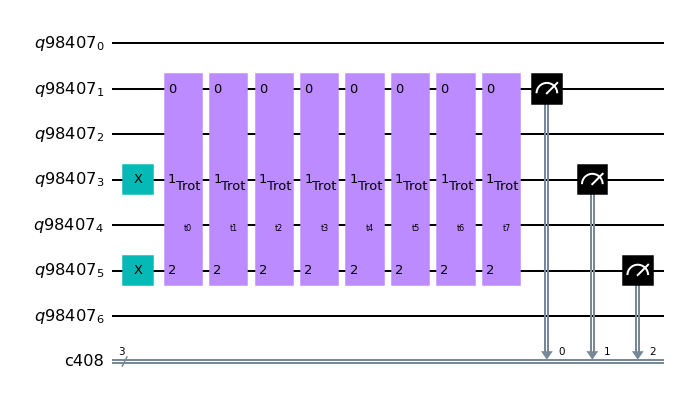

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.19891
Current parameters: [0.297 0.884 0.518 0.139 0.269 0.296 0.17  0.568] (sum to 3.14)

Iter 2 done!
Loss value: -0.19579
Current parameters: [0.461 0.787 0.648 0.051 0.231 0.197 0.168 0.599] (sum to 3.14)

Iter 3 done!
Loss value: -0.2497
Current parameters: [0.43  0.799 0.535 0.232 0.207 0.185 0.201 0.551] (sum to 3.14)

Iter 4 done!
Loss value: -0.27085
Current parameters: [0.552 0.709 0.437 0.318 0.179 0.178 0.253 0.515] (sum to 3.14)

Iter 5 done!
Loss value: -0.27886
Current parameters: [0.594 0.671 0.391 0.265 0.193 0.199 0.303 0.525] (sum to 3.14)

Iter 6 done!
Loss value: -0.27267
Current parameters: [0.559 0.664 0.372 0.22  0.212 0.227 0.284 0.603] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.27886
            Iterations: 6
            Function evalua

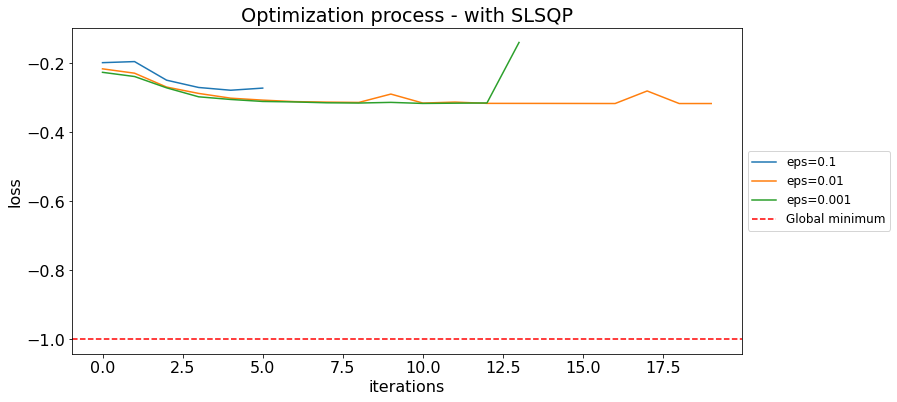


Optimization results:



optimizer    eps                                       final_params  \
1     slsqp  0.010  [0.37535481582770297, 0.35193514312660623, 0.3...   
2     slsqp  0.001  [0.3832401812579784, 0.34611984827556097, 0.35...   
0     slsqp  0.100  [0.5942559063193363, 0.6712434343553875, 0.391...   

   final_loss  
1    -0.31748  
2    -0.31738  
0    -0.27886

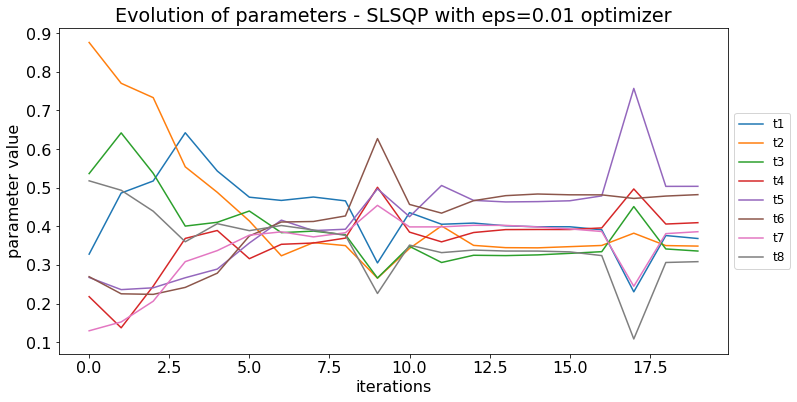

Best parameters (sum to 3.14):	[0.375 0.352 0.344 0.406 0.505 0.479 0.376 0.304]
Best parameters (sum to 1):	[0.119 0.112 0.109 0.129 0.161 0.153 0.12  0.097]


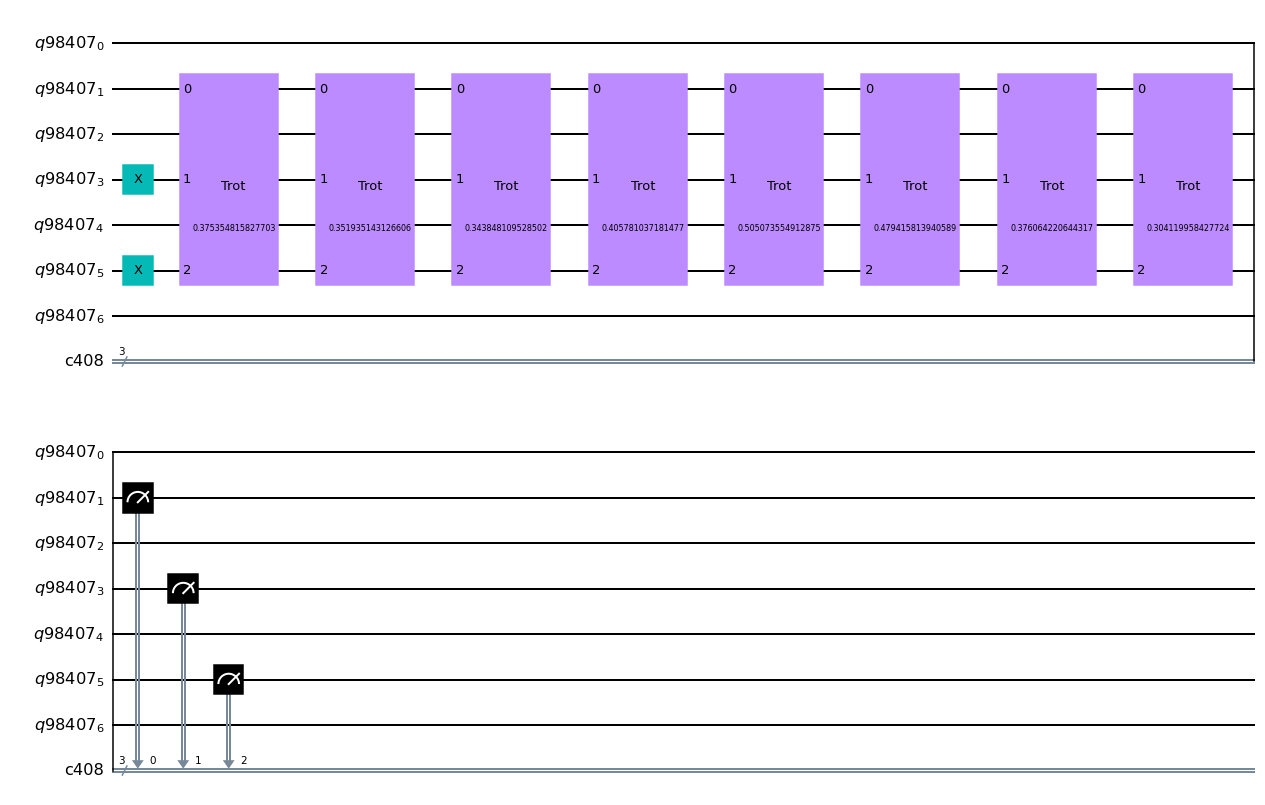

################################################################################
Single trotterization step:


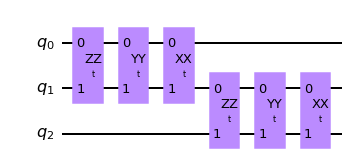

################################################################################

All steps + measurements of state tomography:


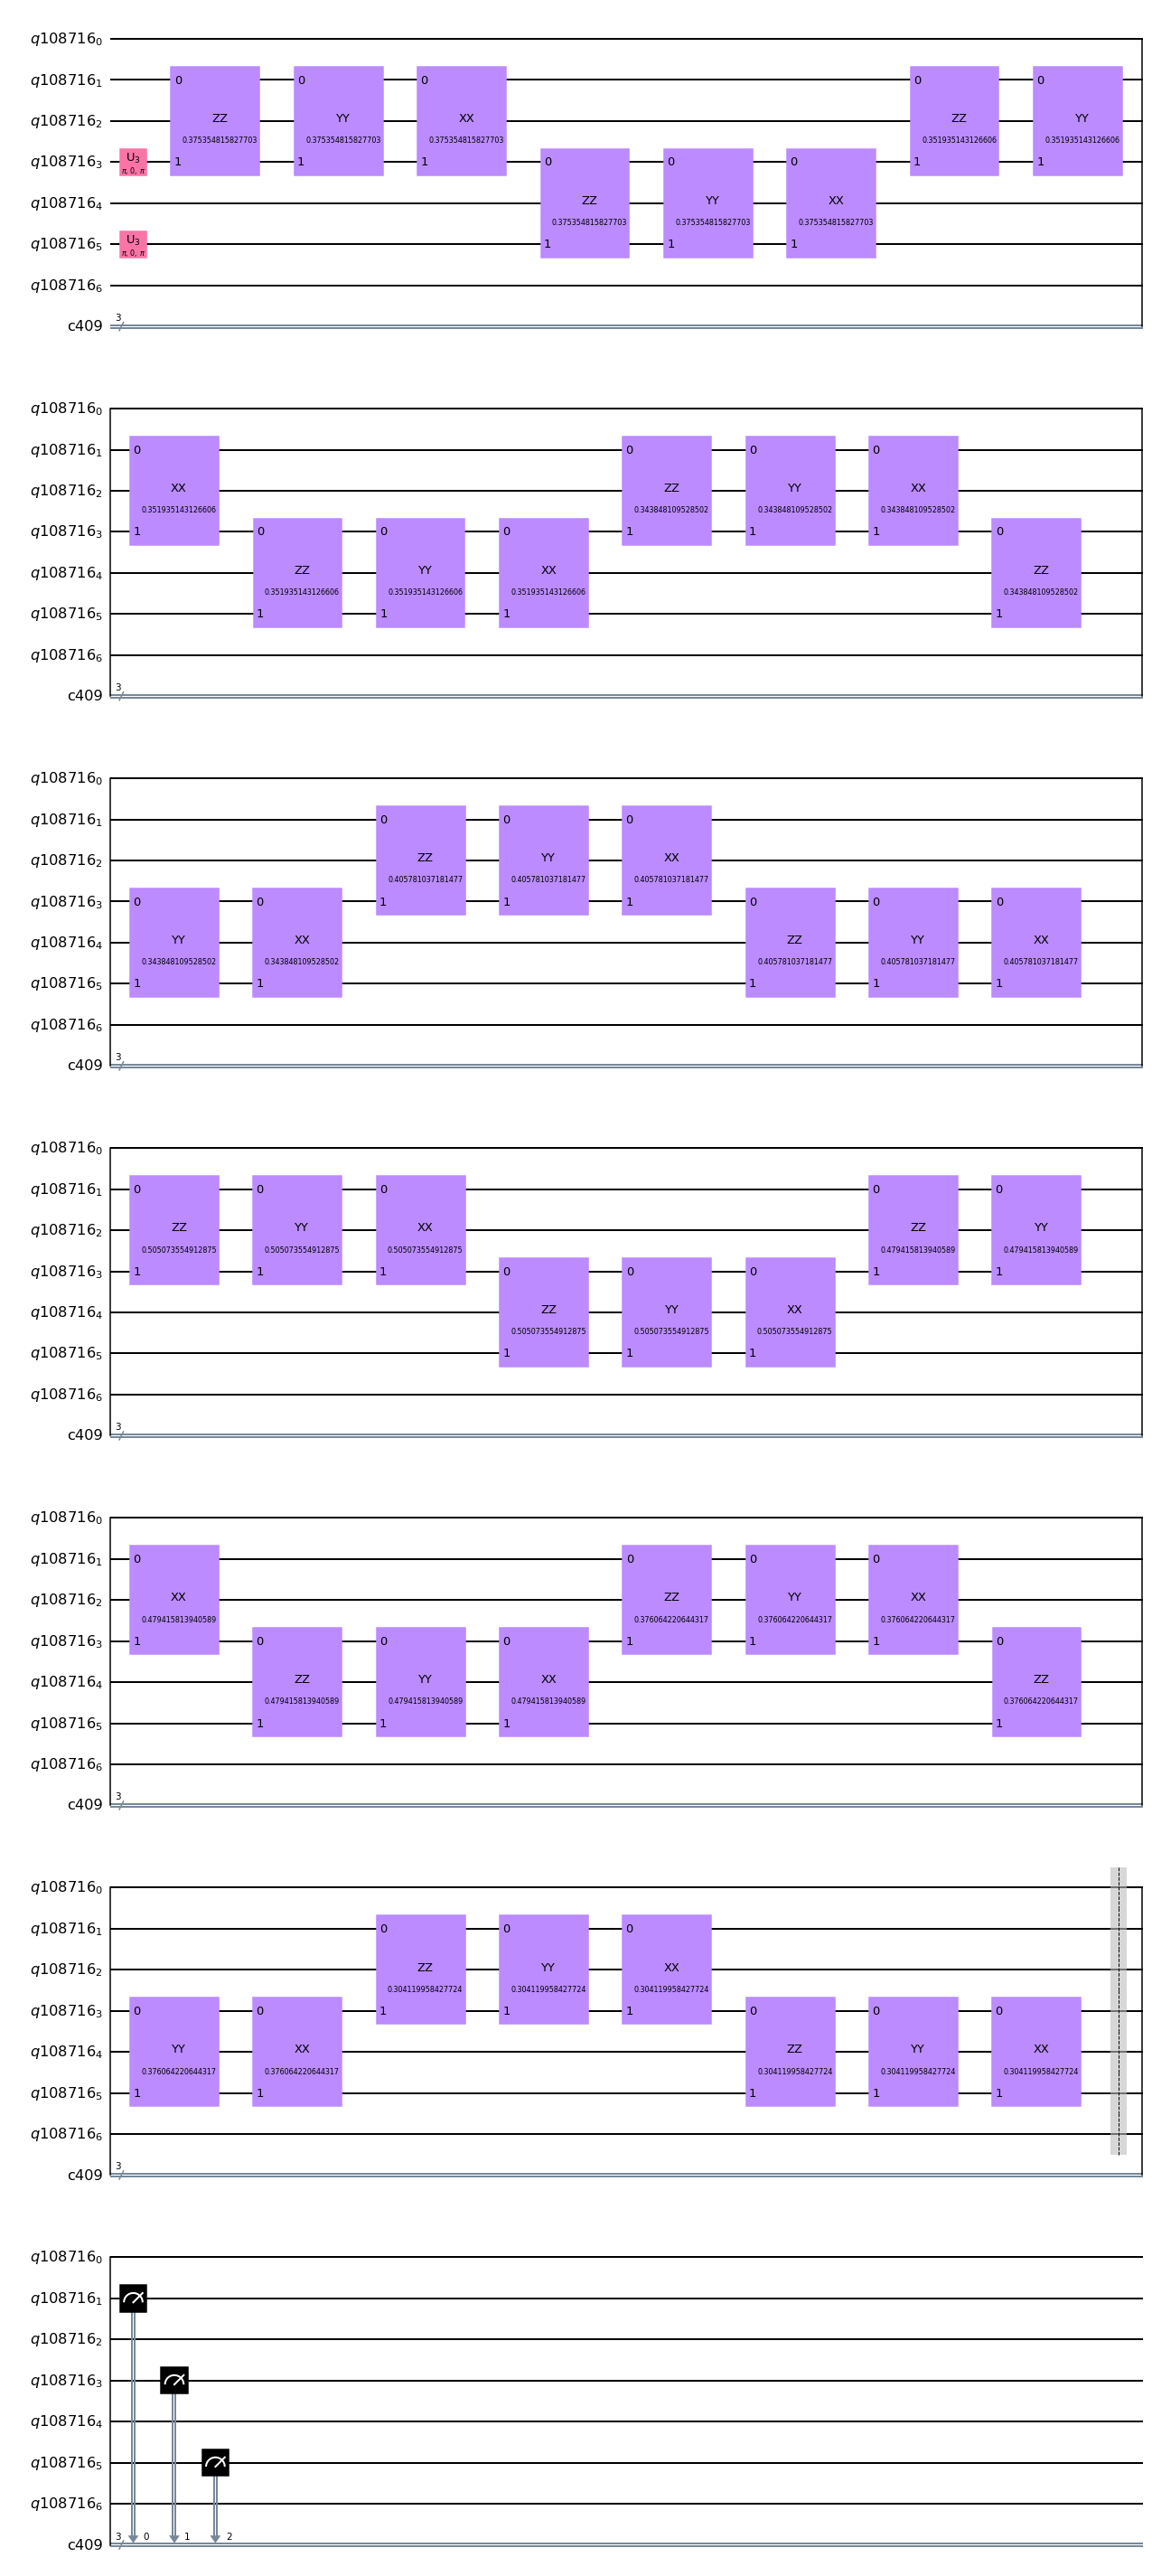

################################################################################

1/8 - Job ID c613251d-6875-4901-b5e3-10242c3eae5d
2/8 - Job ID 1ebb3286-e677-4bf6-87c1-2c0cf68d79f0
3/8 - Job ID 3306c490-01ac-4a24-aaab-6eb2be118b92
4/8 - Job ID ca62abbd-a10a-44b7-9b56-cebd51c14a2a
5/8 - Job ID ced3554b-a9f8-4ecf-925a-6e2e25c62bc2
6/8 - Job ID 9b91d0ab-801c-4ec9-a438-79e5314b42b6
7/8 - Job ID f9585f4e-c7c3-4531-af53-cc8d81e21192
8/8 - Job ID d1225e96-c530-4241-b8c5-4f2246f6629f

################################################################################

Final results - order: 1 - strotter steps: 8

State tomography fidelity = 0.3184 ± 0.0011

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:44



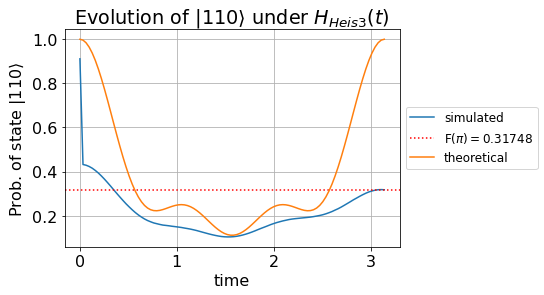

In [7]:
order, trotter_steps = 1, 8
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

________________

________________

________________

________________

### Second order, 4 steps, variable time

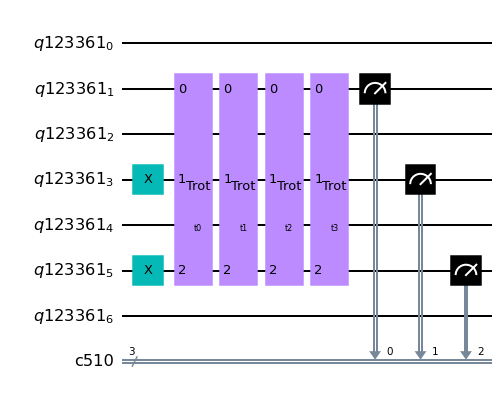

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.10869
Current parameters: [0.36  1.209 0.884 0.688] (sum to 3.14)

Iter 2 done!
Loss value: -0.23747
Current parameters: [1.110e-16 1.588e+00 1.063e+00 4.909e-01] (sum to 3.14)

Iter 3 done!
Loss value: -0.50558
Current parameters: [5.801e-14 1.752e+00 1.258e+00 1.314e-01] (sum to 3.14)

Iter 4 done!
Loss value: -0.63539
Current parameters: [0.    1.749 1.392 0.   ] (sum to 3.14)

Iter 5 done!
Loss value: -0.6176
Current parameters: [2.285e-13 1.718e+00 1.423e+00 5.740e-13] (sum to 3.14)

Iter 6 done!
Loss value: -0.65693
Current parameters: [1.170e-13 1.591e+00 1.551e+00 2.708e-13] (sum to 3.14)

Iter 7 done!
Loss value: -0.65699
Current parameters: [0.    1.556 1.586 0.   ] (sum to 3.14)

Iter 8 done!
Loss value: -0.6325
Current parameters: [2.553e-13 1.572e+00 1.569e+00 6.477e-13] (sum to 3.14)

Optimization terminated suc

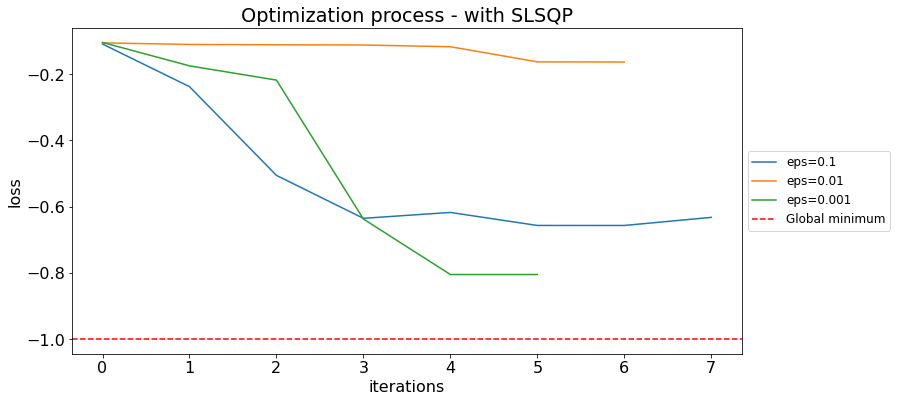


Optimization results:



optimizer    eps                                       final_params  \
2     slsqp  0.001                 [3.141592653589793, 0.0, 0.0, 0.0]   
0     slsqp  0.100  [5.4983394231394396e-14, 1.5722785468804357, 1...   
1     slsqp  0.010  [1.807246684515488e-15, 1.4068499038763032, 1....   

   final_loss  
2    -0.80523  
0    -0.65719  
1    -0.16254

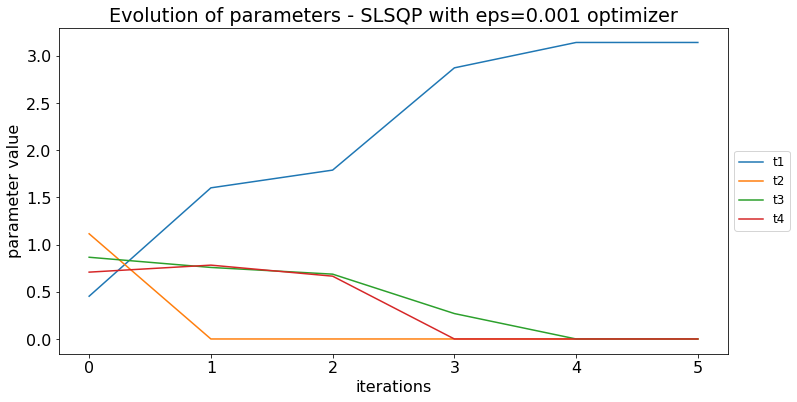

Best parameters (sum to 3.14):	[3.142 0.    0.    0.   ]
Best parameters (sum to 1):	[1. 0. 0. 0.]


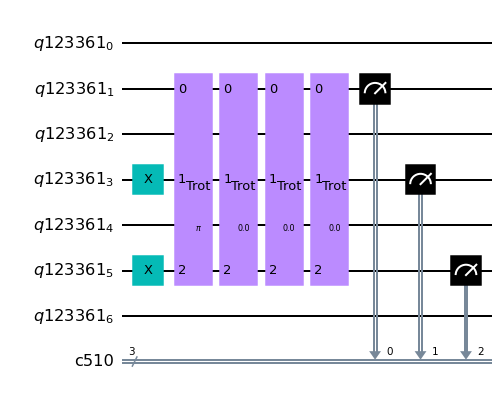

################################################################################
Single trotterization step:


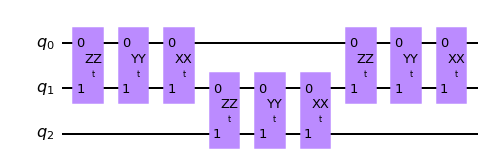

################################################################################

All steps + measurements of state tomography:


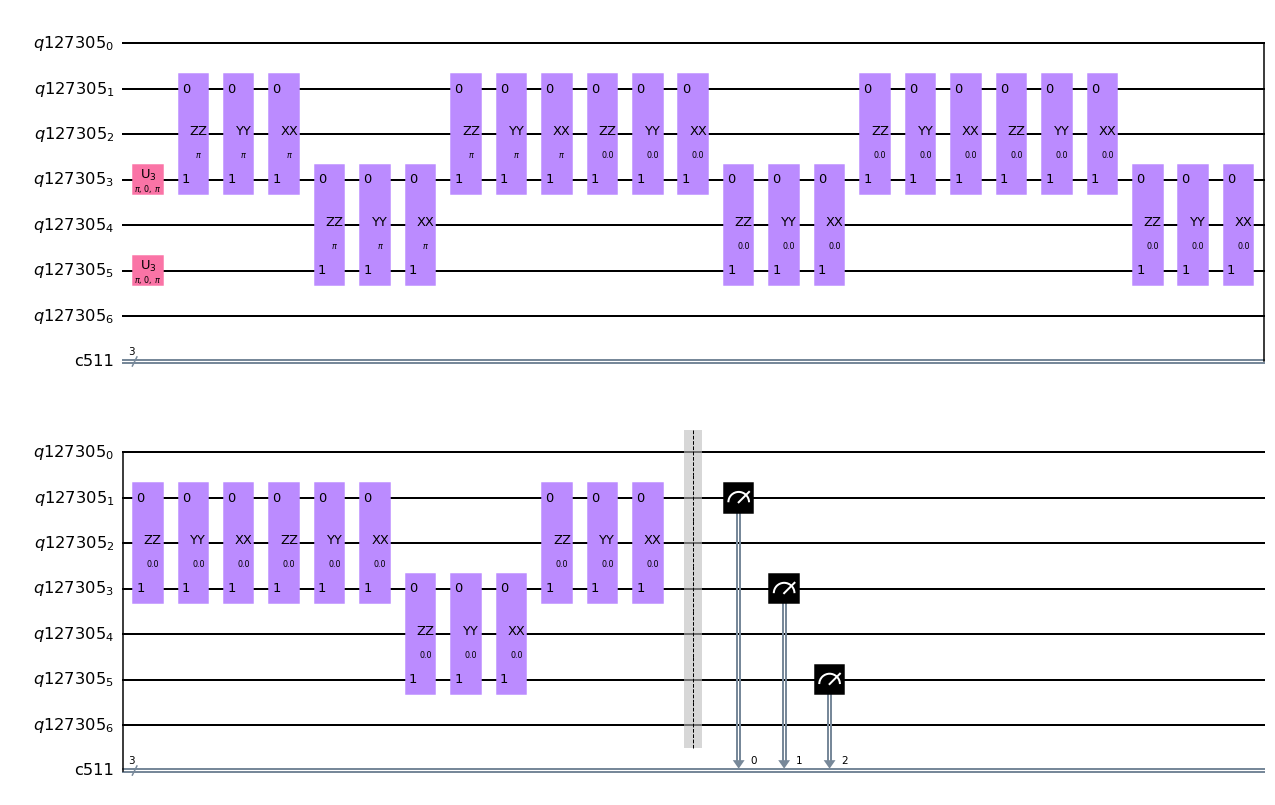

################################################################################

1/8 - Job ID f727fb9f-b985-4c1e-843e-6d6bd1bc335e
2/8 - Job ID 878ff28d-b9c7-4f63-8326-a9906ee2bf25
3/8 - Job ID 0b264e48-a518-40a9-aaa7-b29e95d3c230
4/8 - Job ID 78045a20-e7b5-4d17-98cc-c70729ad07a3
5/8 - Job ID 2705b7d0-9f85-4d5a-afe7-8df50ad9dcb4
6/8 - Job ID abc859ba-db18-47df-bd7b-c6e07178dc3f
7/8 - Job ID c733ebff-a829-45cc-9dfb-c0824bb2477c
8/8 - Job ID 79793a51-6c35-40d5-9b6f-c05ae804ccda

################################################################################

Final results - order: 2 - strotter steps: 4

State tomography fidelity = 0.8031 ± 0.0021

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:34



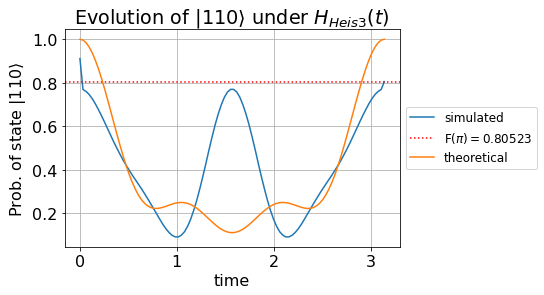

In [8]:
order, trotter_steps = 2, 4
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### Second order, 5 steps, variable time

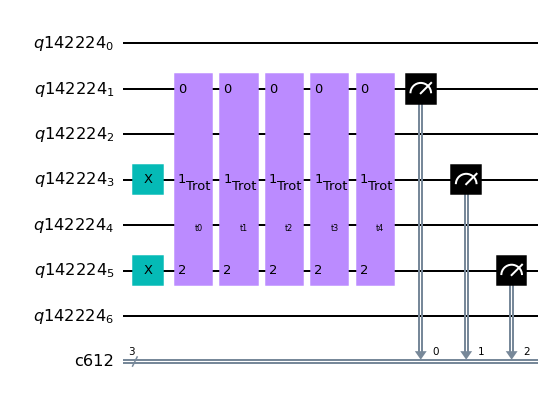

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.10826
Current parameters: [0.421 1.083 0.789 0.658 0.191] (sum to 3.14)

Iter 2 done!
Loss value: -0.11426
Current parameters: [0.425 1.185 0.618 0.605 0.309] (sum to 3.14)

Iter 3 done!
Loss value: -0.09197
Current parameters: [0.395 1.568 0.    0.408 0.77 ] (sum to 3.14)

Iter 4 done!
Loss value: -0.09484
Current parameters: [0.353 1.642 0.    0.353 0.794] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.11536
            Iterations: 4
            Function evaluations: 37
            Gradient evaluations: 4

Total time of optimization: 00:00:35

Optimizer: SLSQP
eps = 0.01

Iter 1 done!
Loss value: -0.11714
Current parameters: [0.454 1.027 0.763 0.69  0.207] (sum to 3.14)

Iter 2 done!
Loss value: -0.13603
Current parameters: [0.901 0.397 0.136 0.884 0.824] (sum to 

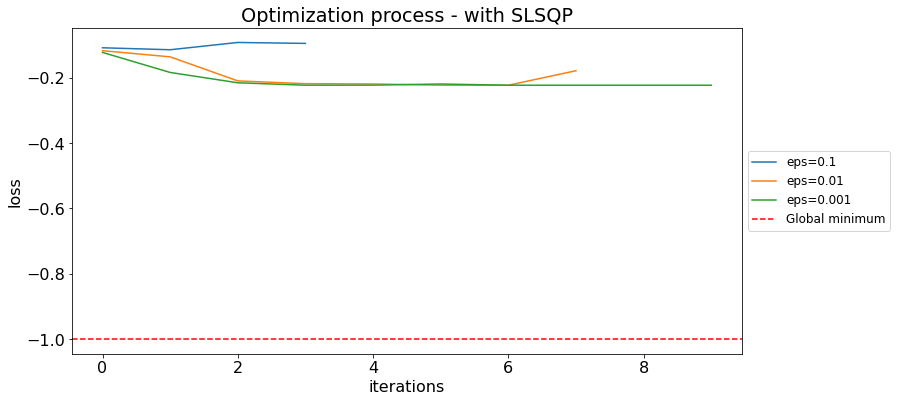


Optimization results:



optimizer    eps                                       final_params  \
2     slsqp  0.001  [0.7329222088224321, 0.6056964412313803, 0.438...   
1     slsqp  0.010  [0.7384631134633054, 0.6226701161108287, 0.442...   
0     slsqp  0.100  [0.41974981006313244, 1.2482010737699387, 0.51...   

   final_loss  
2    -0.22298  
1    -0.22297  
0    -0.11536

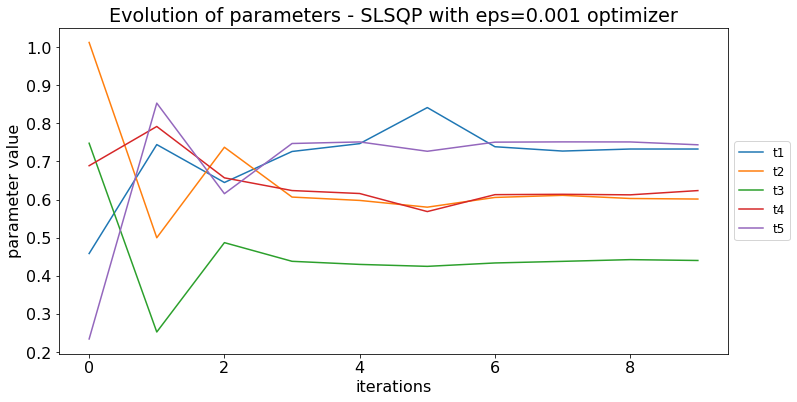

Best parameters (sum to 3.14):	[0.733 0.606 0.439 0.613 0.751]
Best parameters (sum to 1):	[0.233 0.193 0.14  0.195 0.239]


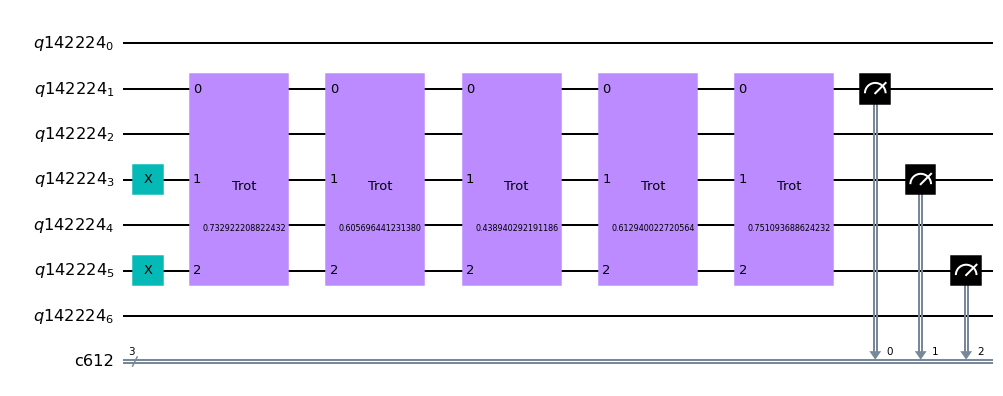

################################################################################
Single trotterization step:


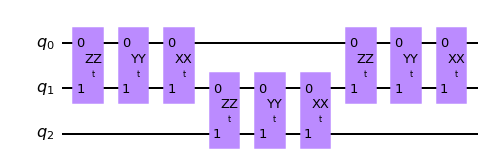

################################################################################

All steps + measurements of state tomography:


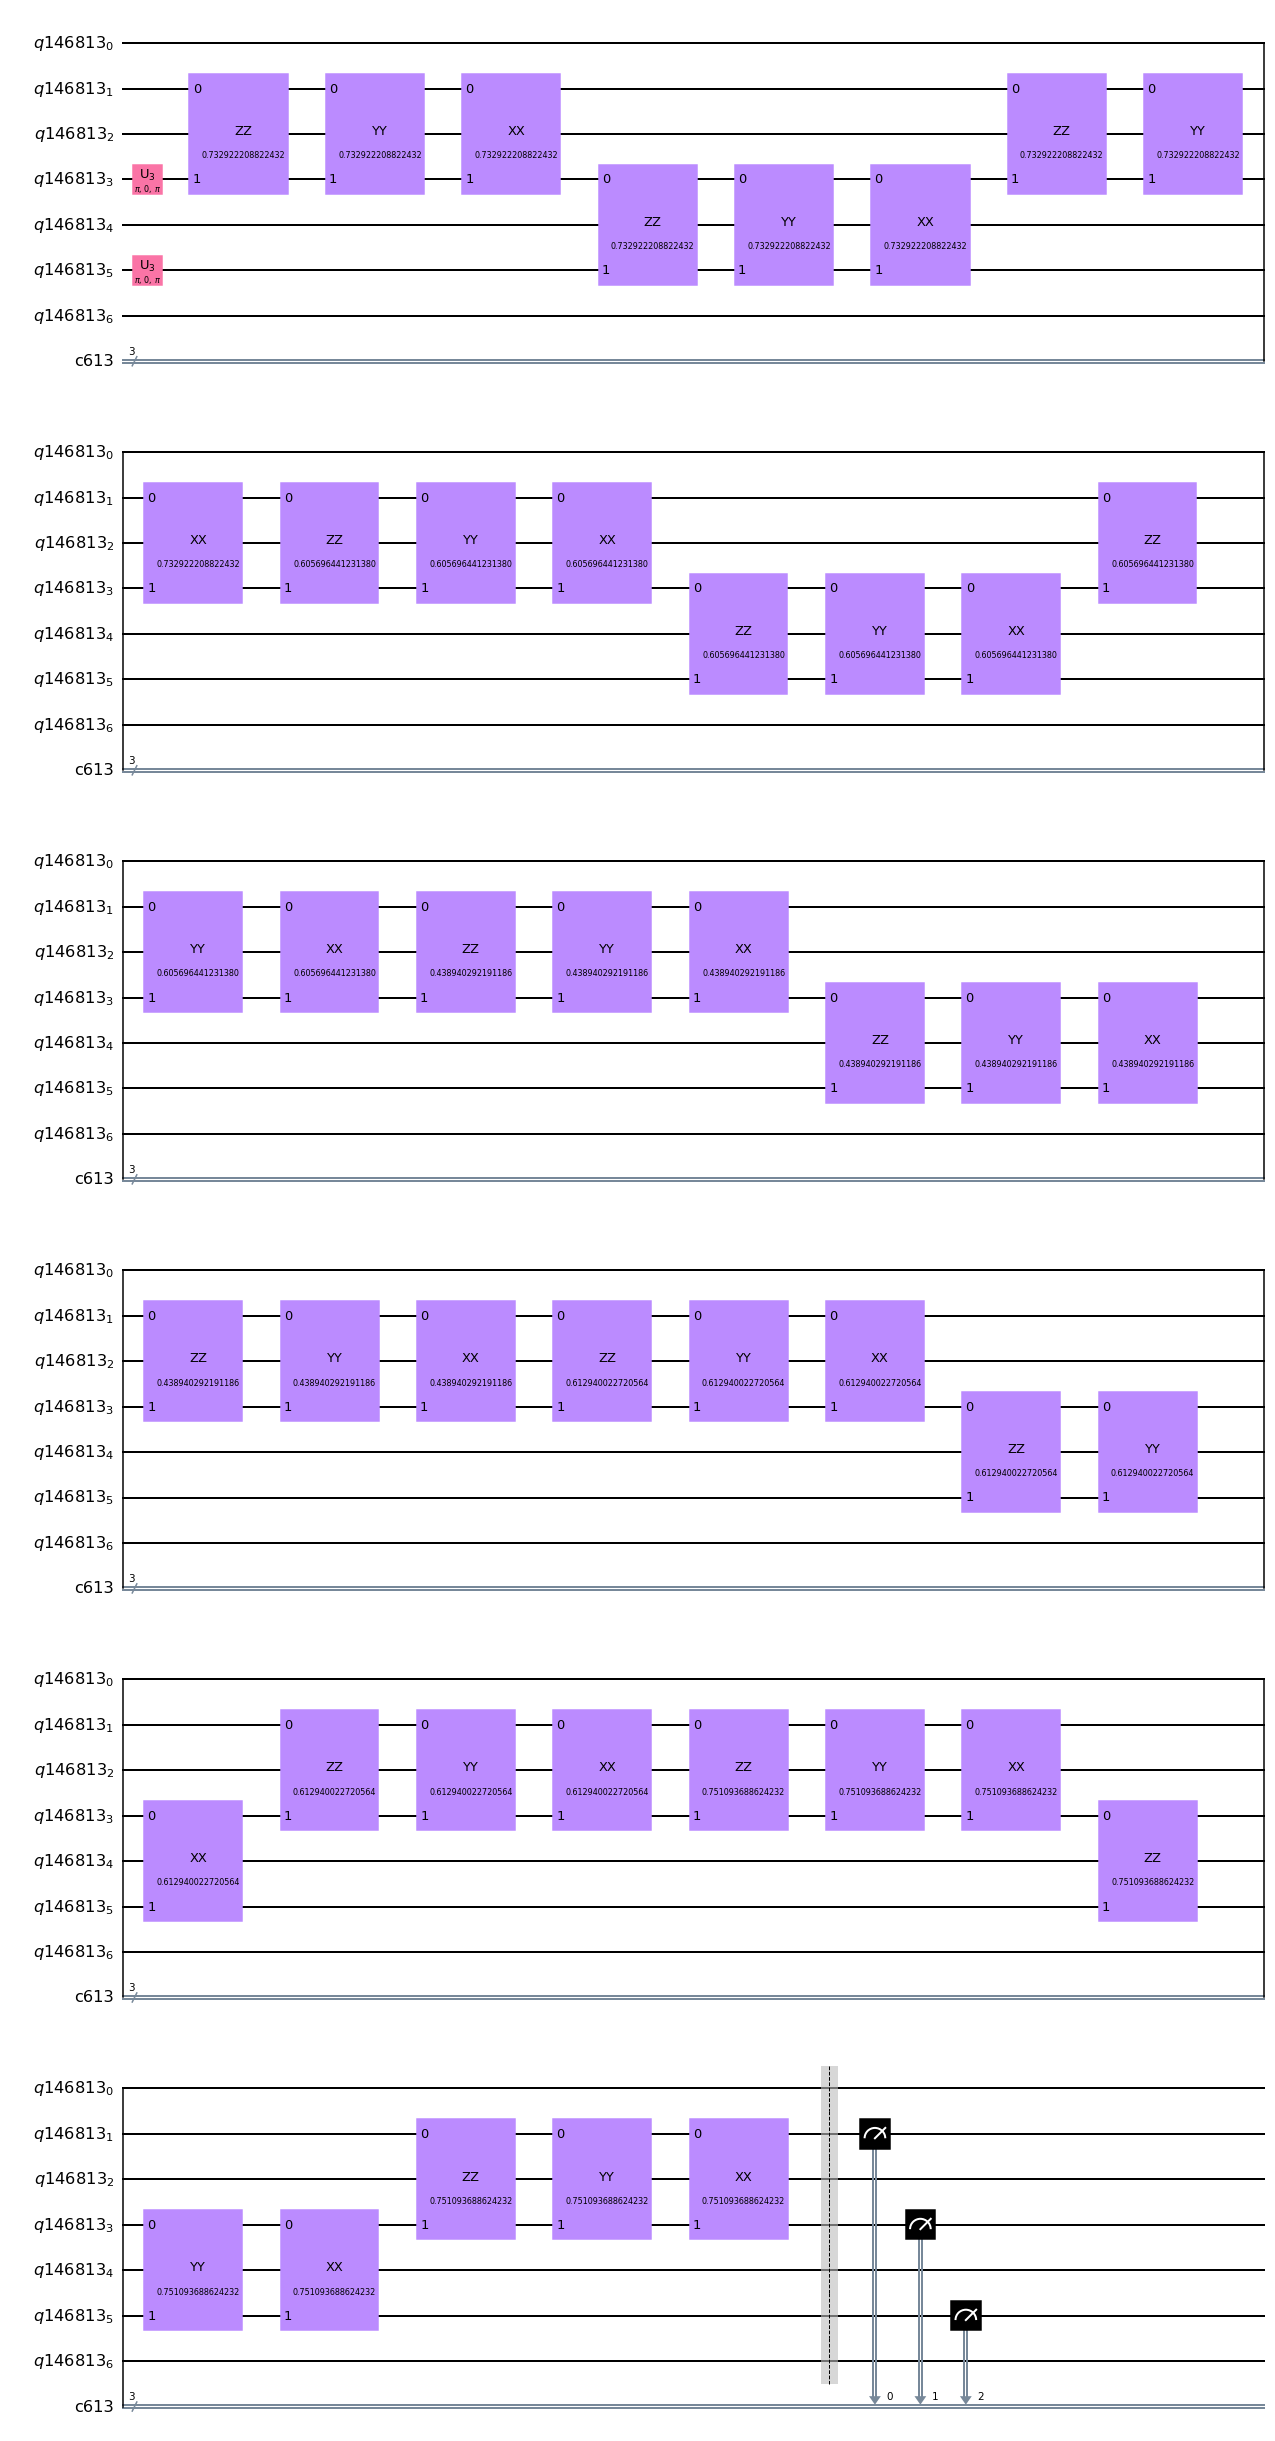

################################################################################

1/8 - Job ID 7758a463-5992-4d5a-a5f3-4abc03f15196
2/8 - Job ID d407586f-e518-48dc-9c56-546ddea01875
3/8 - Job ID 83f830ce-8d24-46fd-9e2a-eda9cdcbc404
4/8 - Job ID 12347898-7816-432c-9b72-7da3a62d12fe
5/8 - Job ID 2a751ef1-d150-4762-b662-3aebe26eb17f
6/8 - Job ID 0820843d-0f21-41c3-a533-1ec7f7e8b89c
7/8 - Job ID 630fd03f-1702-4fb1-8a2e-d0929a826d1f
8/8 - Job ID e12bd370-d45b-4967-a34f-eb6db6db2a96

################################################################################

Final results - order: 2 - strotter steps: 5

State tomography fidelity = 0.2220 ± 0.0032

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:41



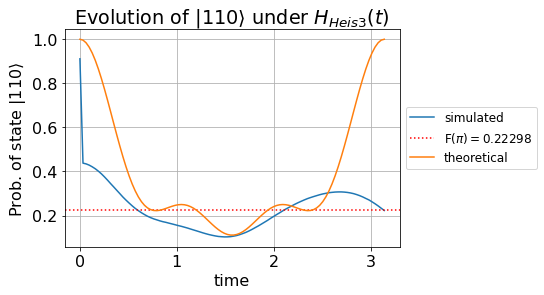

In [9]:
order, trotter_steps = 2, 5
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### Second order, 6 steps, variable time

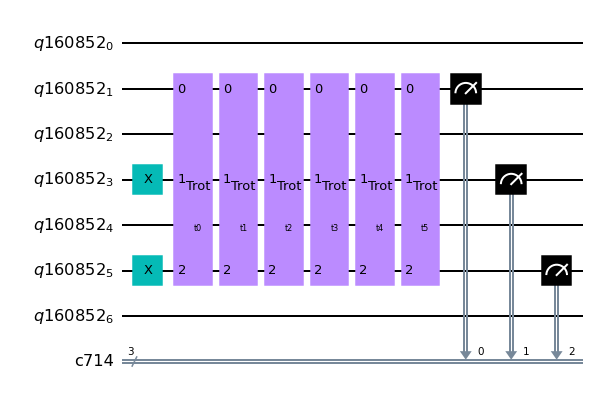

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.16098
Current parameters: [0.423 0.926 0.698 0.606 0.228 0.262] (sum to 3.14)

Iter 2 done!
Loss value: -0.15749
Current parameters: [0.695 0.098 0.153 0.457 0.809 0.93 ] (sum to 3.14)

Iter 3 done!
Loss value: -0.23468
Current parameters: [0.532 0.572 0.466 0.485 0.54  0.546] (sum to 3.14)

Iter 4 done!
Loss value: -0.23635
Current parameters: [0.526 0.577 0.464 0.465 0.575 0.535] (sum to 3.14)

Iter 5 done!
Loss value: -0.2363
Current parameters: [0.525 0.578 0.466 0.464 0.577 0.532] (sum to 3.14)

Iter 6 done!
Loss value: -0.23632
Current parameters: [0.524 0.576 0.467 0.464 0.579 0.531] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.23636
            Iterations: 6
            Function evaluations: 55
            Gradient evaluations: 6

Total time of optimizatio

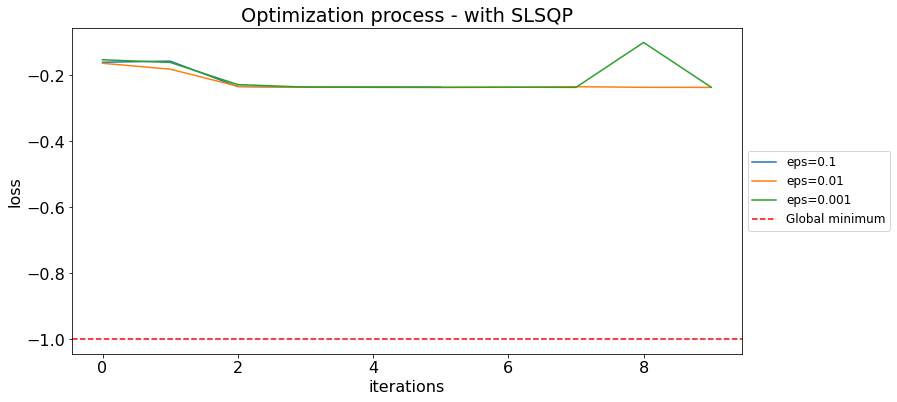


Optimization results:



optimizer    eps                                       final_params  \
2     slsqp  0.001  [0.5227021436816373, 0.6066038819156159, 0.442...   
1     slsqp  0.010  [0.5225282191665059, 0.606290283740754, 0.4451...   
0     slsqp  0.100  [0.5255278807924597, 0.5767167399307315, 0.464...   

   final_loss  
2    -0.23716  
1    -0.23713  
0    -0.23636

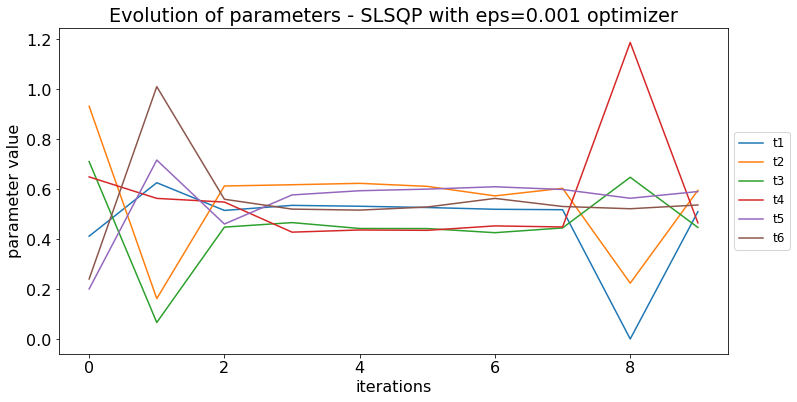

Best parameters (sum to 3.14):	[0.523 0.607 0.442 0.44  0.6   0.53 ]
Best parameters (sum to 1):	[0.166 0.193 0.141 0.14  0.191 0.169]


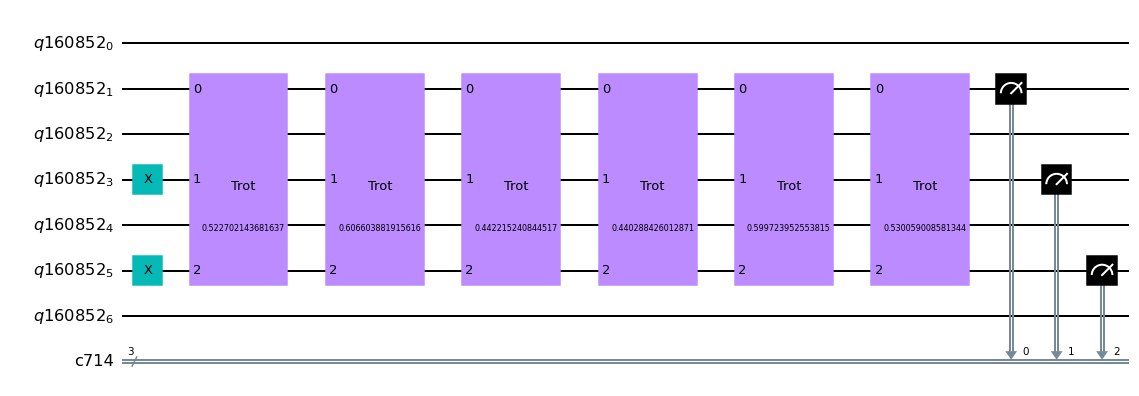

################################################################################
Single trotterization step:


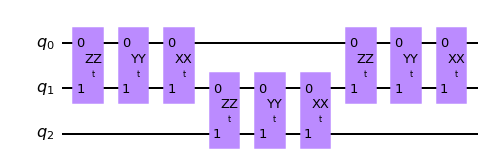

################################################################################

All steps + measurements of state tomography:


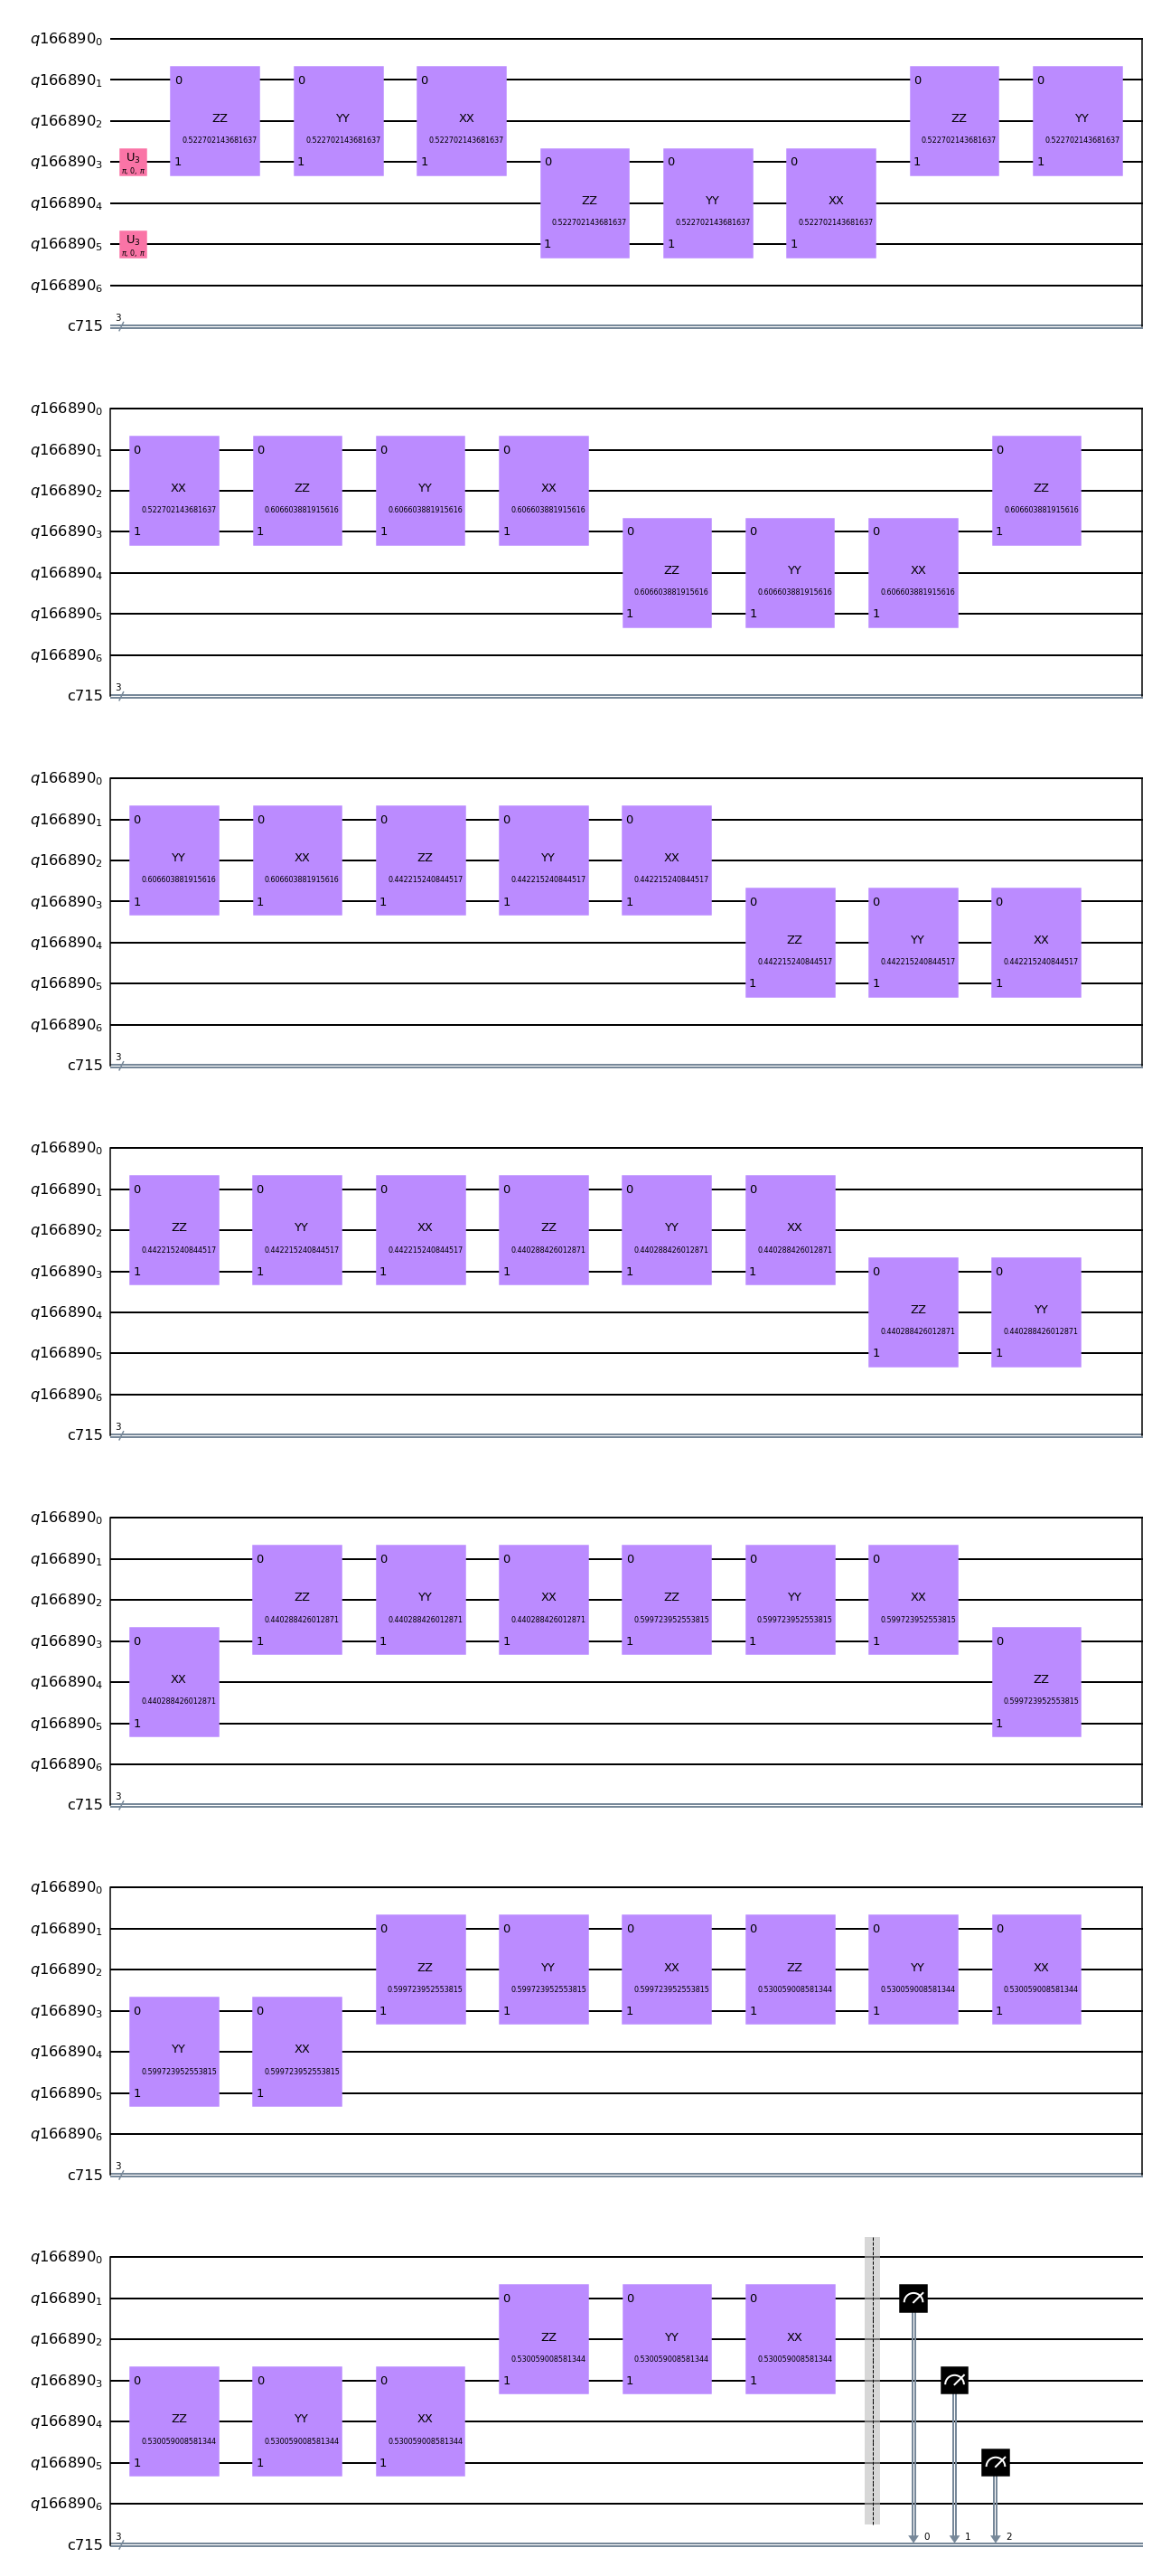

################################################################################

1/8 - Job ID 9ea8cf94-3c96-4197-89ac-83f191a372d0
2/8 - Job ID 8c76f2ad-42a9-4b6b-9e7f-eac5601a7612
3/8 - Job ID 55f7a306-df8d-4d05-81b4-dccb6dceb928
4/8 - Job ID de6cf6ef-e95d-4e05-bf53-9830af99a6a2
5/8 - Job ID d1123c13-743b-41a7-93fd-019d8e51cfec
6/8 - Job ID a1e83594-86d8-44c3-a5b5-d7bf614c81e3
7/8 - Job ID a2c87a50-fb50-4265-b76a-7e3652811b8a
8/8 - Job ID 19bc0990-c6fd-4c68-9af0-127d044bcb01

################################################################################

Final results - order: 2 - strotter steps: 6

State tomography fidelity = 0.2368 ± 0.0020

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:47



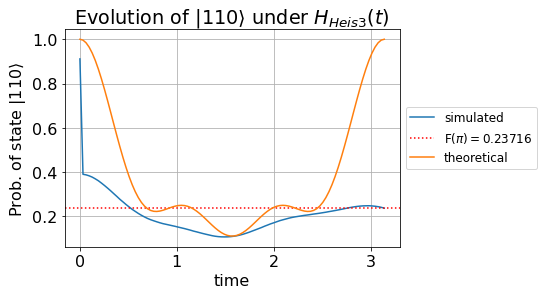

In [10]:
order, trotter_steps = 2, 6
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### Second order, 7 steps, variable time

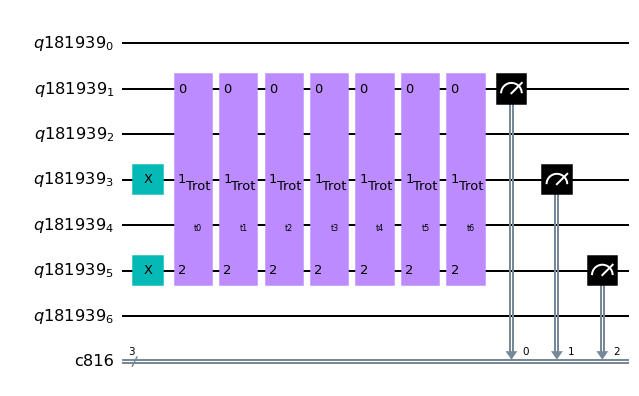

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.17339
Current parameters: [0.403 0.879 0.672 0.586 0.209 0.235 0.158] (sum to 3.14)

Iter 2 done!
Loss value: -0.18611
Current parameters: [0.552 0.124 0.195 0.368 0.588 0.616 0.699] (sum to 3.14)

Iter 3 done!
Loss value: -0.2274
Current parameters: [0.457 0.499 0.436 0.442 0.421 0.453 0.433] (sum to 3.14)

Iter 4 done!
Loss value: -0.22945
Current parameters: [0.424 0.511 0.447 0.408 0.445 0.48  0.425] (sum to 3.14)

Iter 5 done!
Loss value: -0.22941
Current parameters: [0.424 0.509 0.444 0.412 0.443 0.482 0.427] (sum to 3.14)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.22945
            Iterations: 5
            Function evaluations: 52
            Gradient evaluations: 5

Total time of optimization: 00:00:56

Optimizer: SLSQP
eps = 0.01

Iter 1 done!
Loss value: -0.17643
C

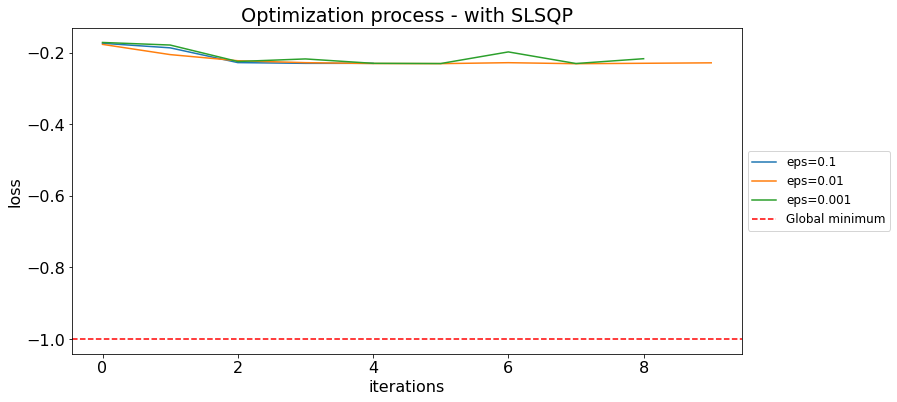


Optimization results:



optimizer    eps                                       final_params  \
1     slsqp  0.010  [0.4070853798534391, 0.5385484229841666, 0.438...   
2     slsqp  0.001  [0.41906276353289357, 0.549919640082472, 0.424...   
0     slsqp  0.100  [0.4244681559542864, 0.5114779491215755, 0.447...   

   final_loss  
1    -0.23052  
2    -0.23016  
0    -0.22945

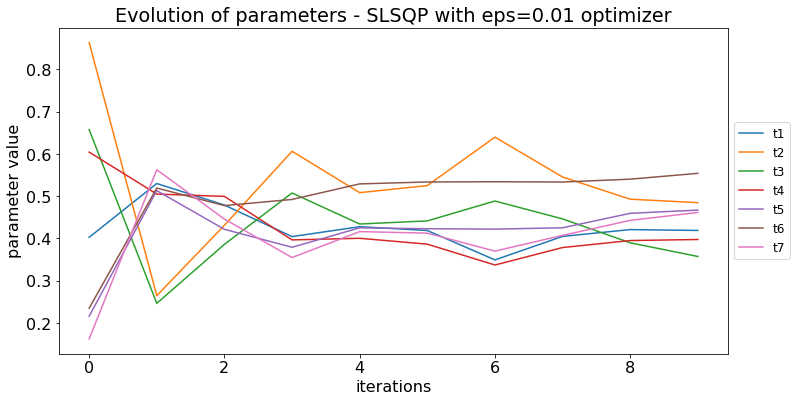

Best parameters (sum to 3.14):	[0.407 0.539 0.439 0.38  0.43  0.535 0.412]
Best parameters (sum to 1):	[0.13  0.171 0.14  0.121 0.137 0.17  0.131]


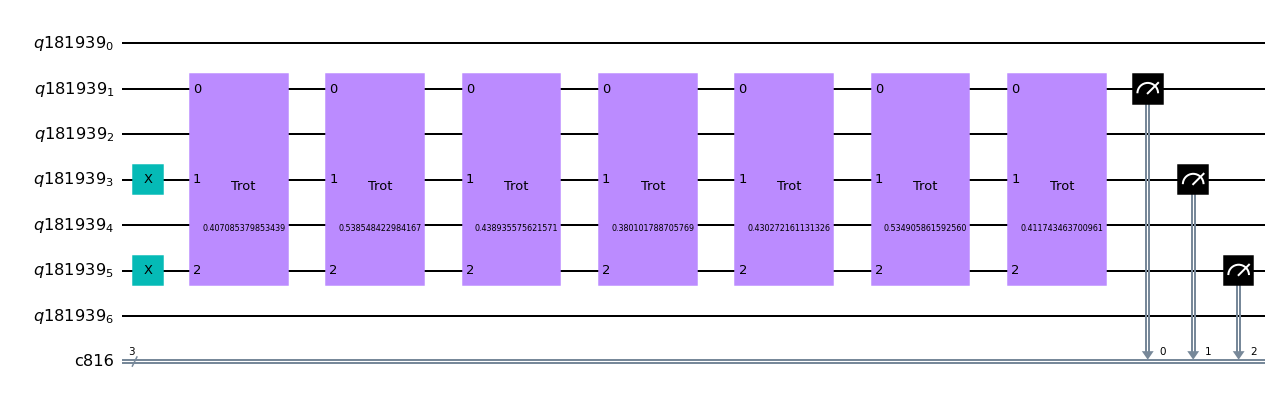

################################################################################
Single trotterization step:


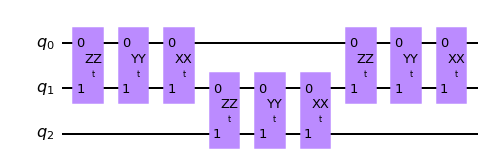

################################################################################

All steps + measurements of state tomography:


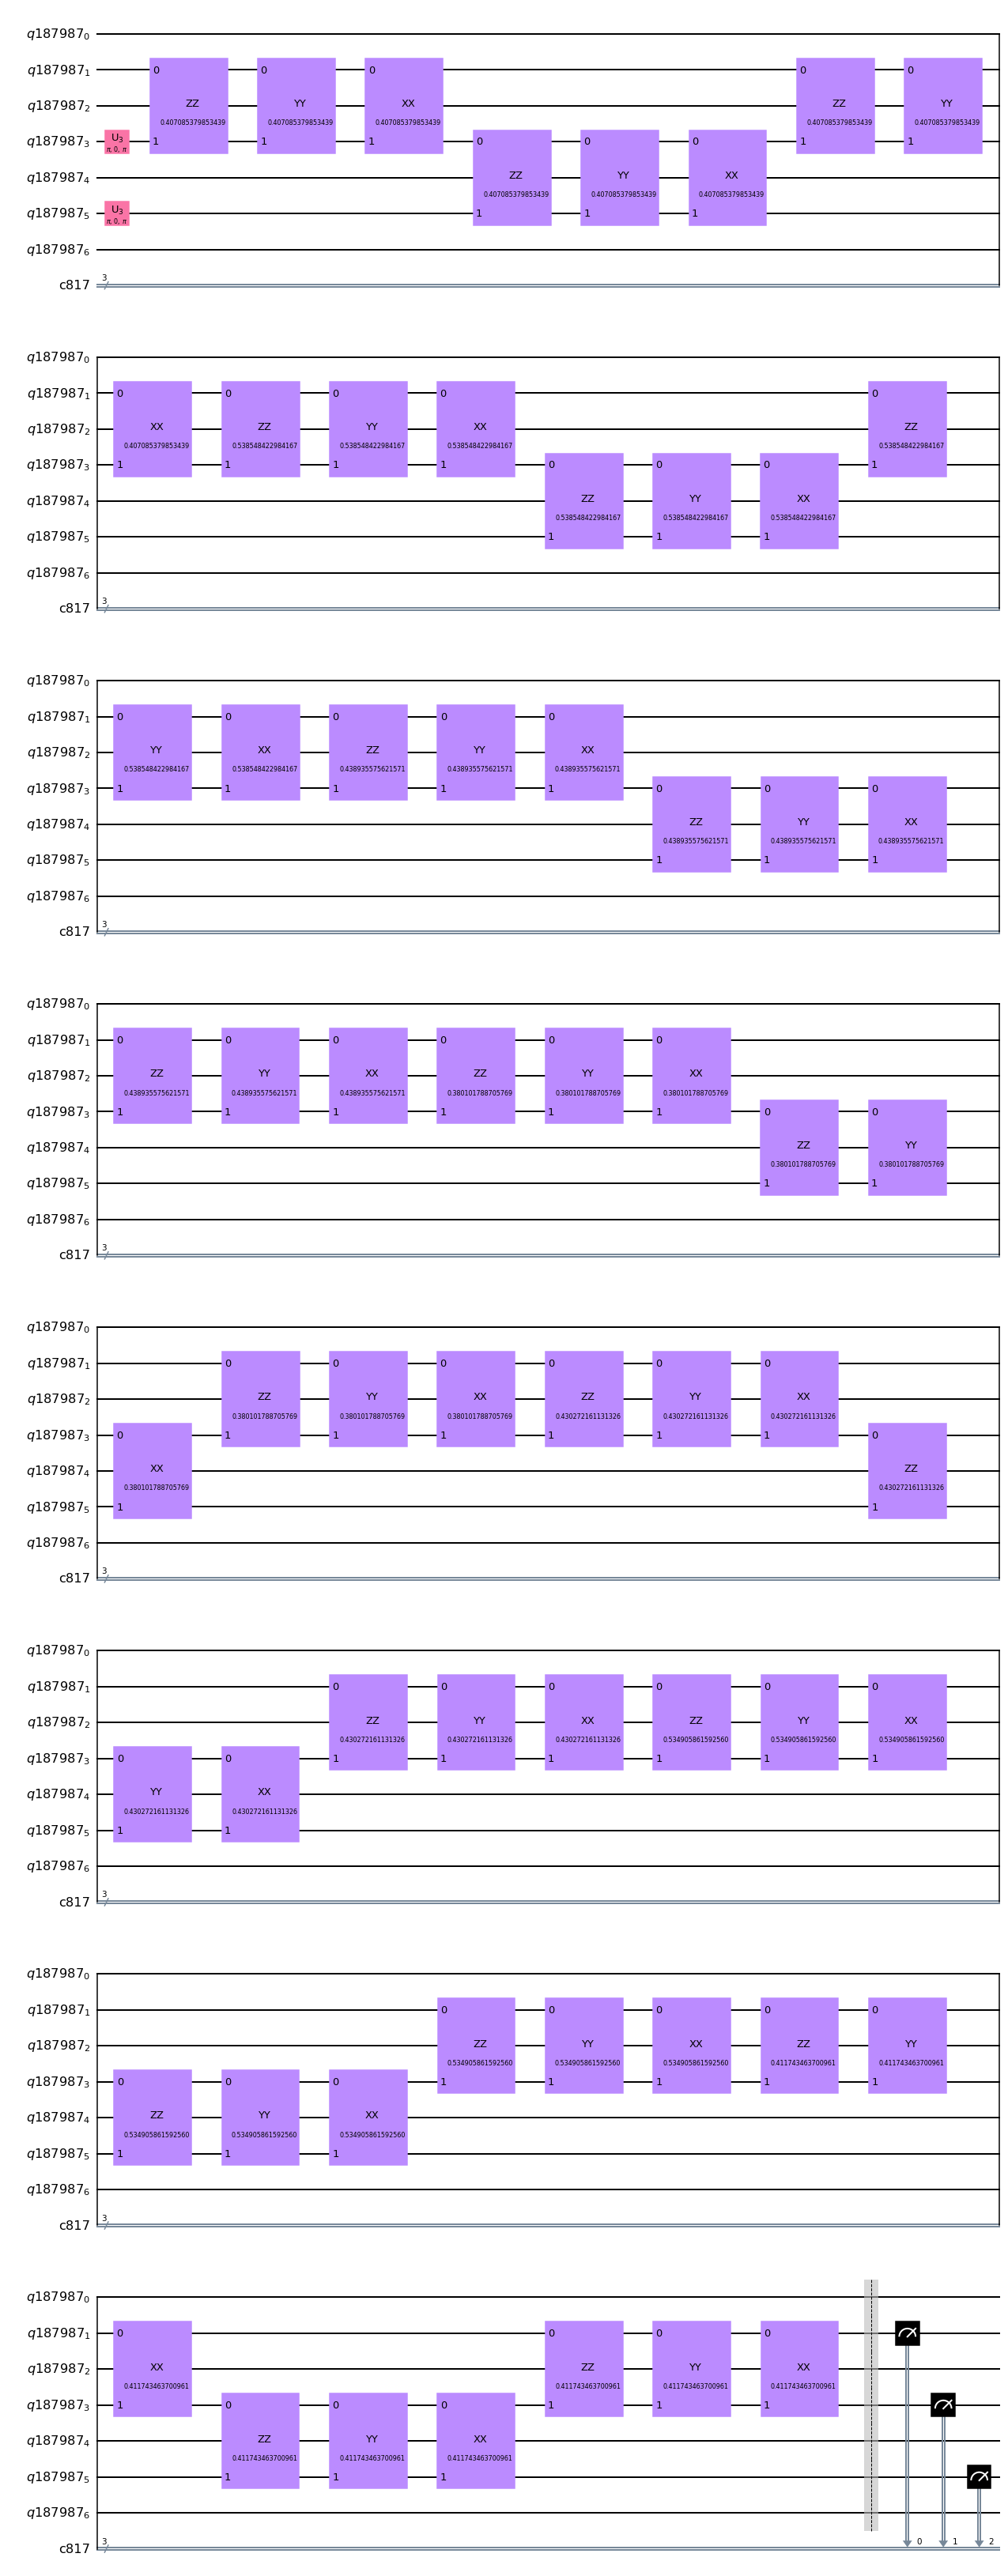

################################################################################

1/8 - Job ID 61579430-6c22-4ede-8b18-48e7195bf654
2/8 - Job ID 4661fa2c-0805-4eb3-9265-758a5c1ea2c8
3/8 - Job ID 8997497e-e737-4672-bc64-2ce39f532d53
4/8 - Job ID aac92383-ff15-4b56-a19b-9d0bda5b5722
5/8 - Job ID ad4b85ca-9887-4be9-a17e-b06f086c0262
6/8 - Job ID 5530737b-f1b2-4f9f-b908-5acadadf9d60
7/8 - Job ID a93b8f50-abd1-4792-97a5-f6a1344ff7dc
8/8 - Job ID 4be23e89-5695-48ca-9217-d1d73cb91da1

################################################################################

Final results - order: 2 - strotter steps: 7

State tomography fidelity = 0.2293 ± 0.0023

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:02:03



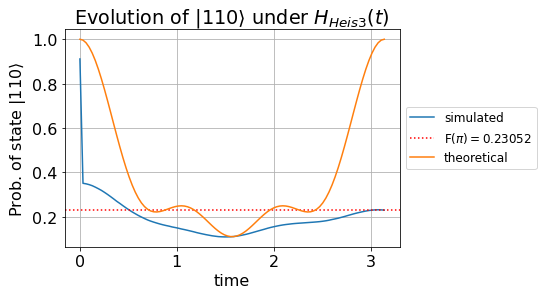

In [11]:
order, trotter_steps = 2, 7
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### Second order, 8 steps, variable time

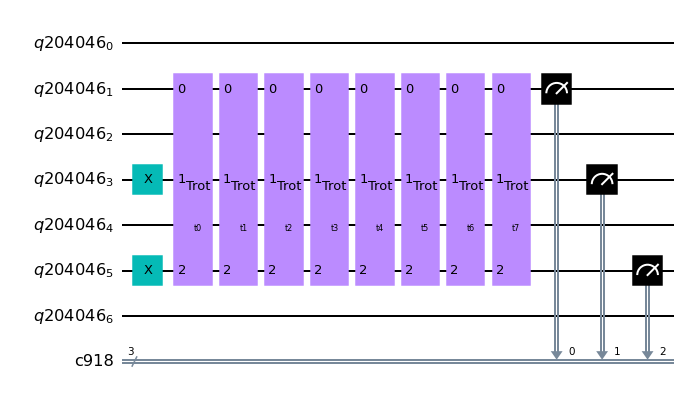

################################################################################

Starting optimization!


Optimizer: SLSQP
eps = 0.1

Iter 1 done!
Loss value: -0.18346
Current parameters: [0.332 0.716 0.532 0.488 0.193 0.186 0.094 0.601] (sum to 3.14)

Iter 2 done!
Loss value: -0.2065
Current parameters: [0.485 0.444 0.345 0.412 0.536 0.494 0.354 0.072] (sum to 3.14)

Iter 3 done!
Loss value: -0.21271
Current parameters: [0.425 0.509 0.407 0.43  0.422 0.428 0.309 0.211] (sum to 3.14)

Iter 4 done!
Loss value: -0.21324
Current parameters: [0.398 0.508 0.425 0.427 0.393 0.414 0.315 0.261] (sum to 3.14)

Iter 5 done!
Loss value: -0.21369
Current parameters: [0.364 0.483 0.443 0.41  0.361 0.404 0.344 0.332] (sum to 3.14)

Iter 6 done!
Loss value: -0.21412
Current parameters: [0.357 0.459 0.437 0.399 0.366 0.412 0.371 0.341] (sum to 3.14)

Iter 7 done!
Loss value: -0.21436
Current parameters: [0.353 0.413 0.417 0.384 0.388 0.428 0.416 0.343] (sum to 3.14)

Iter 8 done!
Loss value: -0.21445

Iter 37 done!
Loss value: -0.2293
Current parameters: [0.342 0.588 0.445 0.408 0.457 0.475 0.427 0.   ] (sum to 3.14)

Iter 38 done!
Loss value: -0.2103
Current parameters: [3.399e-01 5.827e-01 4.673e-01 4.056e-01 4.536e-01 4.737e-01 4.188e-01
 4.222e-09] (sum to 3.14)

Iter 39 done!
Loss value: -0.22482
Current parameters: [0.309 0.63  0.539 0.446 0.391 0.463 0.364 0.   ] (sum to 3.14)

Iter 40 done!
Loss value: -0.20944
Current parameters: [3.362e-01 5.716e-01 5.113e-01 4.209e-01 4.461e-01 4.720e-01 3.835e-01
 9.017e-10] (sum to 3.14)

Iter 41 done!
Loss value: -0.19063
Current parameters: [3.118e-01 5.422e-01 7.094e-01 4.947e-01 3.966e-01 4.619e-01 2.250e-01
 4.194e-10] (sum to 3.14)

Iter 42 done!
Loss value: -0.13293
Current parameters: [0.272 0.487 1.016 0.597 0.317 0.453 0.    0.   ] (sum to 3.14)

Iter 43 done!
Loss value: -0.12713
Current parameters: [0.262 0.476 1.046 0.601 0.296 0.461 0.    0.   ] (sum to 3.14)

Iter 44 done!
Loss value: -0.20783
Current parameters: [0.276 0

Iter 95 done!
Loss value: -0.14389
Current parameters: [0.563 0.    0.877 0.    0.805 0.5   0.397 0.   ] (sum to 3.14)

Iter 96 done!
Loss value: -0.14647
Current parameters: [0.564 0.    0.904 0.    0.77  0.514 0.39  0.   ] (sum to 3.14)

Iter 97 done!
Loss value: -0.23028
Current parameters: [0.363 0.563 0.47  0.391 0.442 0.505 0.407 0.   ] (sum to 3.14)

Iter 98 done!
Loss value: -0.23043
Current parameters: [0.39  0.549 0.462 0.371 0.417 0.536 0.417 0.   ] (sum to 3.14)

Iter 99 done!
Loss value: -0.20821
Current parameters: [5.920e-01 4.493e-01 4.019e-01 2.321e-01 2.378e-01 7.286e-01 4.998e-01
 9.054e-13] (sum to 3.14)

Iter 100 done!
Loss value: -0.23053
Current parameters: [0.398 0.552 0.443 0.372 0.416 0.543 0.419 0.   ] (sum to 3.14)

Iter 101 done!
Loss value: -0.23052
Current parameters: [0.401 0.546 0.437 0.377 0.419 0.542 0.42  0.   ] (sum to 3.14)

Iter 102 done!
Loss value: -0.23056
Current parameters: [0.409 0.543 0.422 0.375 0.427 0.544 0.421 0.   ] (sum to 3.14)

Iter

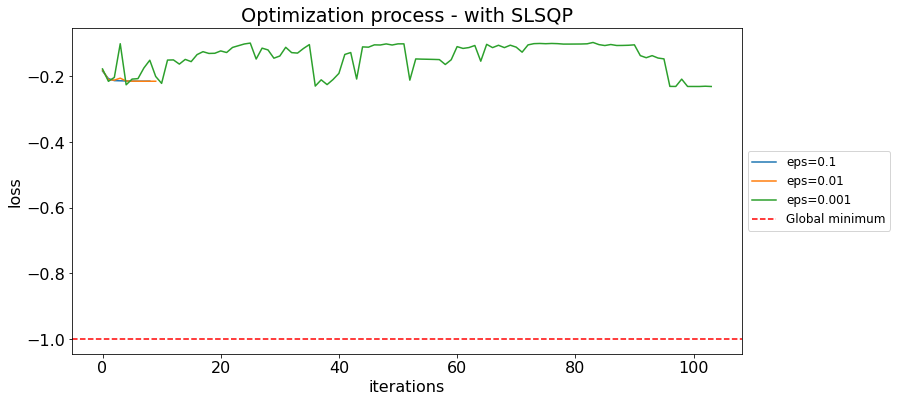


Optimization results:



optimizer    eps                                       final_params  \
2     slsqp  0.001  [0.4112249997920733, 0.5424165443937203, 0.418...   
1     slsqp  0.010  [0.3652728737910658, 0.5100226489500627, 0.432...   
0     slsqp  0.100  [0.34957902309176225, 0.40634500646516203, 0.4...   

   final_loss  
2    -0.23058  
1    -0.21465  
0    -0.21445

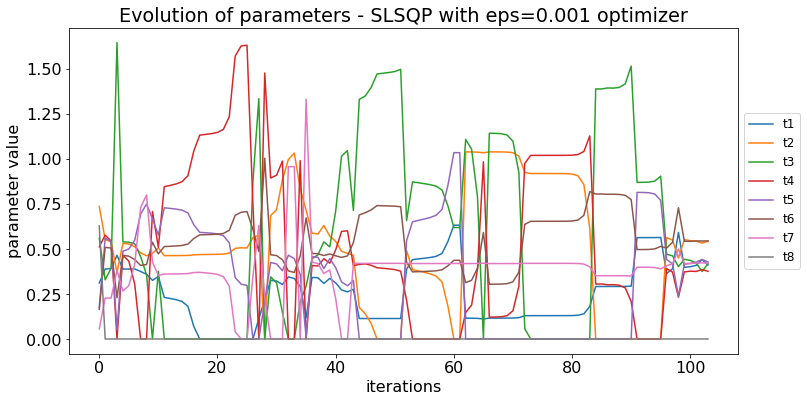

Best parameters (sum to 3.14):	[0.411 0.542 0.418 0.376 0.428 0.544 0.421 0.   ]
Best parameters (sum to 1):	[0.131 0.173 0.133 0.12  0.136 0.173 0.134 0.   ]


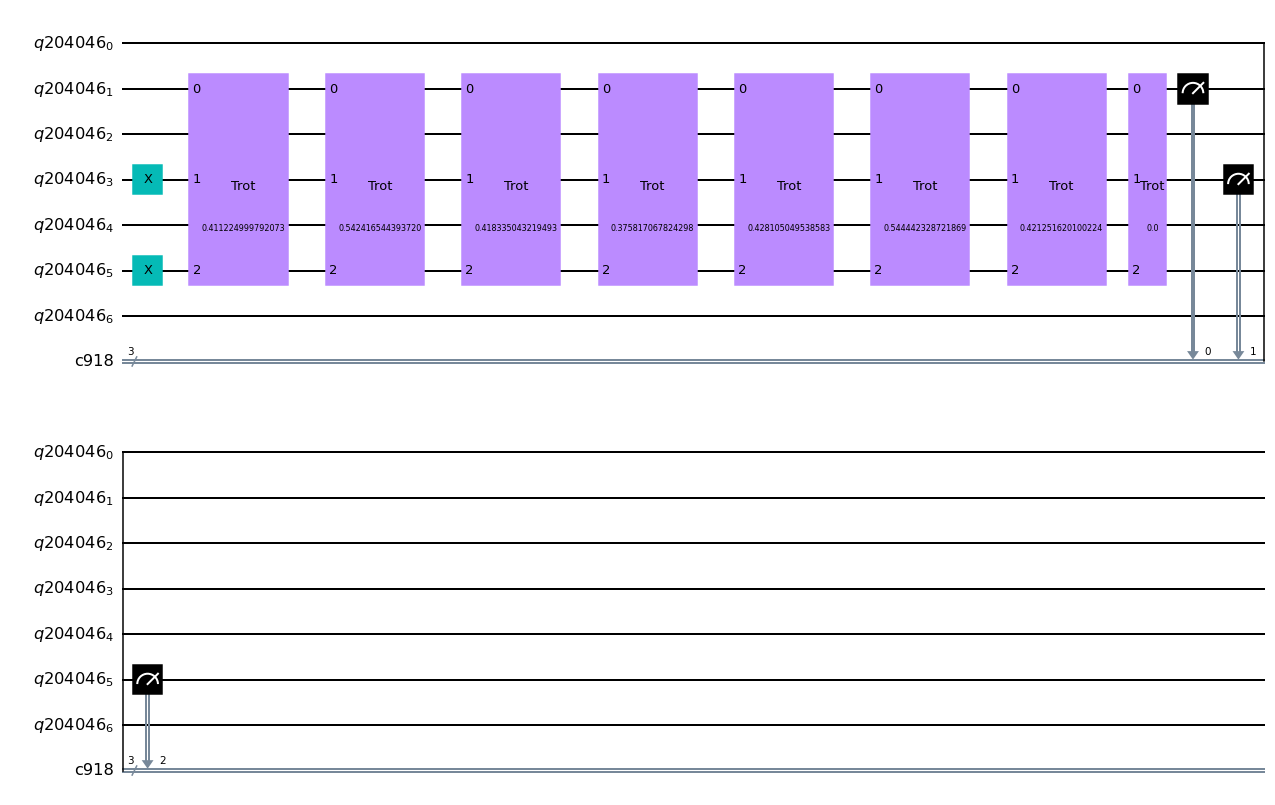

################################################################################
Single trotterization step:


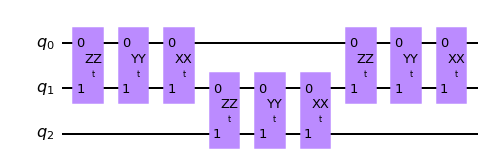

################################################################################

All steps + measurements of state tomography:


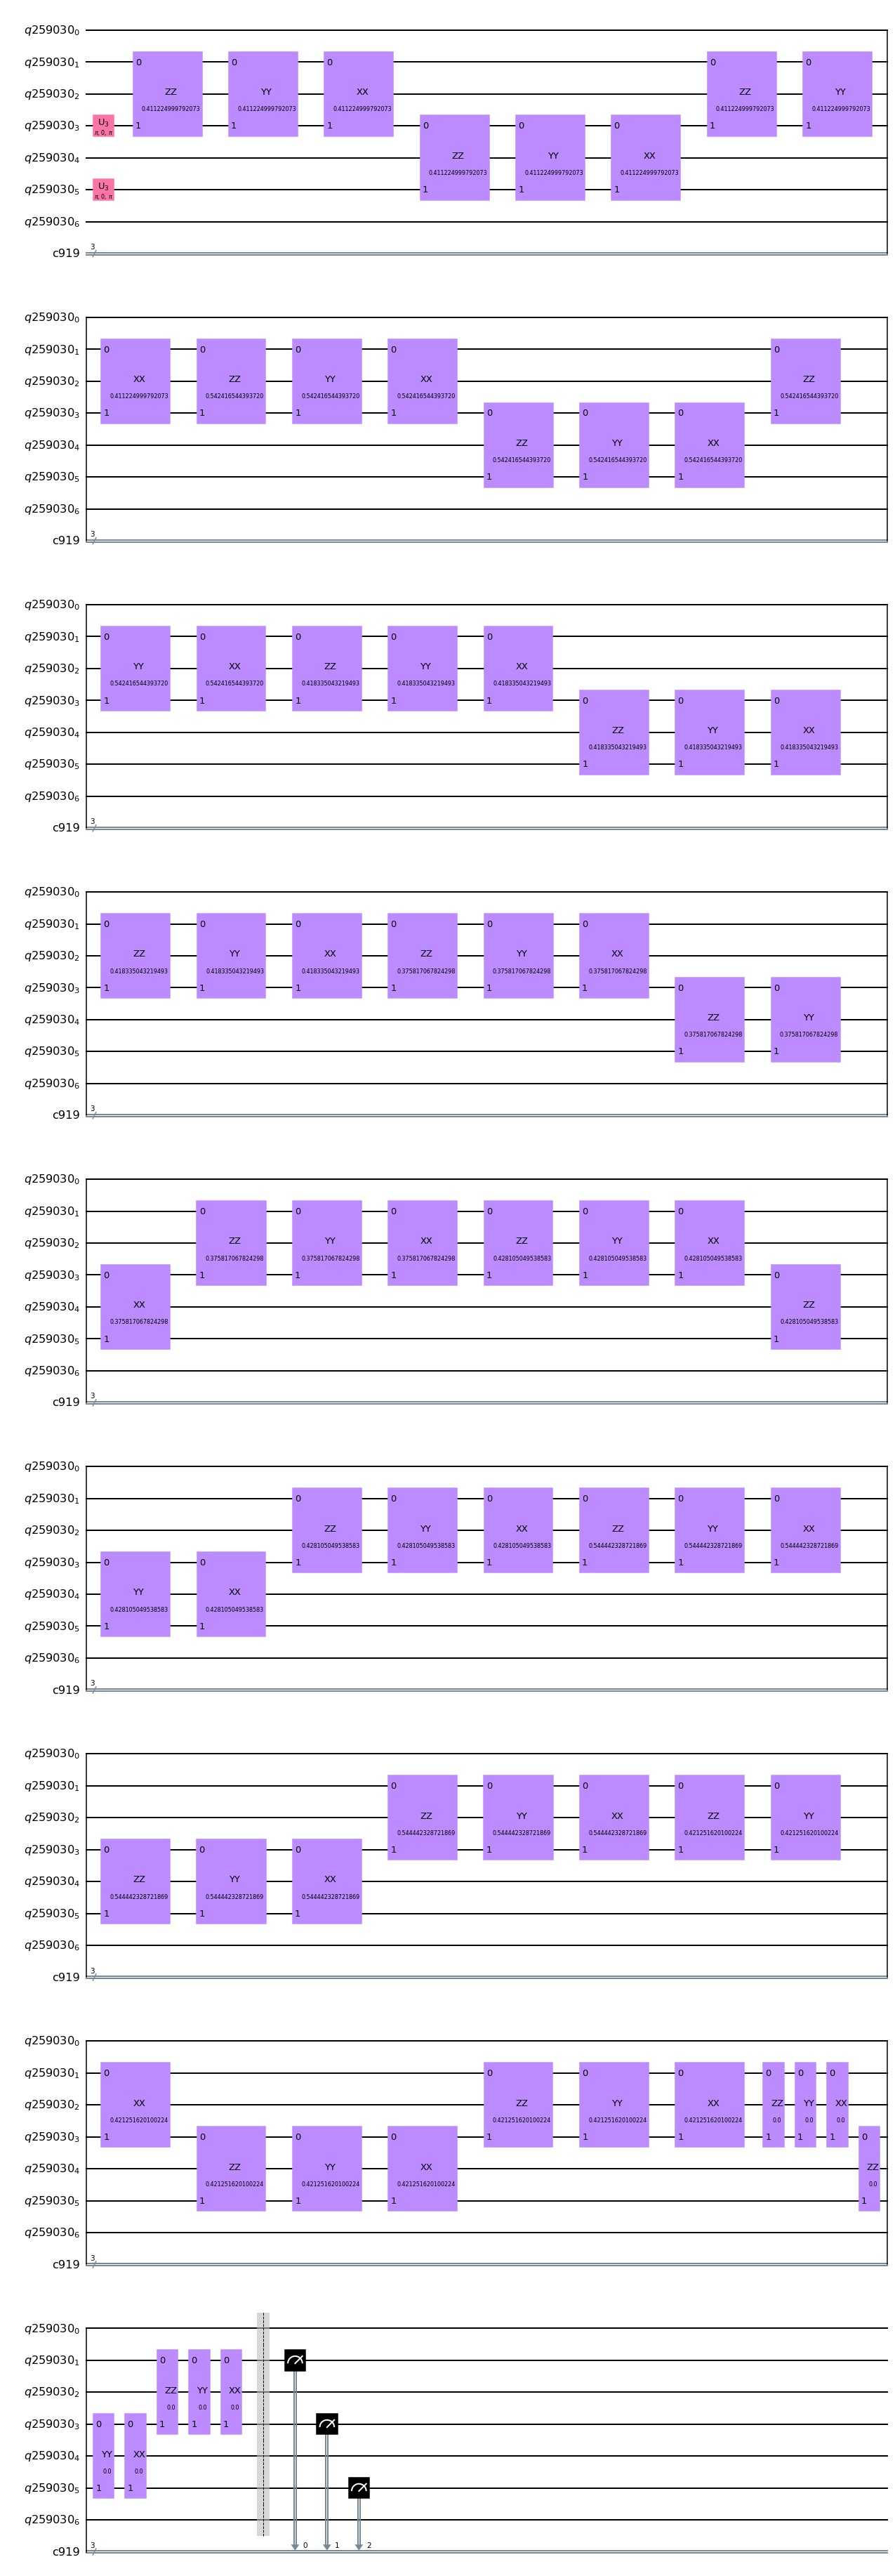

################################################################################

1/8 - Job ID 6506463c-7387-432c-851a-490ea6b25b0f
2/8 - Job ID 30ef0bb1-d132-4190-81e0-3bab4b7eb751
3/8 - Job ID 0a915d81-5d00-4508-889f-8a083876dd4f
4/8 - Job ID fbb0110e-4da3-47b9-9bf7-a4830c109740
5/8 - Job ID 5f8244e0-8ee6-414e-9b82-4322e824c046
6/8 - Job ID 92598549-8194-4ead-b0b4-fe5eb5eb9f13
7/8 - Job ID 8b2e7468-c724-4d05-ad9f-e8a0e26e4b1a
8/8 - Job ID c7f0772c-413b-4fe1-bbb6-2a3fca13f675

################################################################################

Final results - order: 2 - strotter steps: 8

State tomography fidelity = 0.2295 ± 0.0025

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:02:15



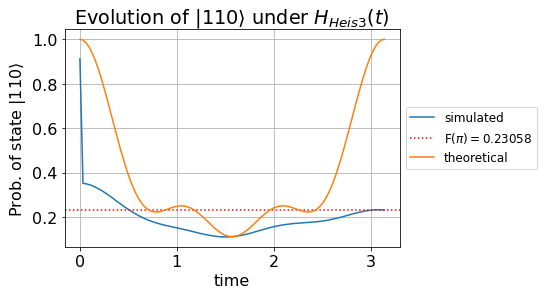

In [12]:
order, trotter_steps = 2, 8
uniform_times = False

qc = full_trotter_circ_no_bind(order, trotter_steps, uniform_times)

show_decompose(qc, n=0)

# ==================================================

qc, best_params = optimize_params_constrained(qc, backend=sim_noisy_jakarta, target_time=np.pi,
                                              maxiter=200,
                                              eps=[0.1, 0.01, 0.001], tol=1e-10, ftol=1e-10)

# ==================================================

show_decompose(qc, n=0)

# ==================================================
###################################################################################
###################################################################################
###################################################################################
# ==================================================

view_single_trotter_step(order, Parameter('t'))

# ==================================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=best_params)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ==================================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ==================================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ==================================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=best_params)
plot_simulation_H_all_t(ts, probs, fidelity_pi)